## Project Description

Dataset: 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Original_data = pd.read_csv(r'D:\william\OneDrive - UW-Madison\UW-Madison\722\-2025AAE722_William-J\Final Project\DataCoSupplyChainDataset1.csv')
data = Original_data.copy()
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
filtered_data = data[['Type','Benefit per order','Delivery Status','Late_delivery_risk','Category Name','Customer Country','Department Name','Market','order date (DateOrders)','Order Item Discount Rate','Order Item Product Price','Order Item Quantity','Order Item Profit Ratio','Order Status','Shipping Mode']]
filtered_data.head()

,Type,Benefit per order,Delivery Status,Late_delivery_risk,Category Name,Customer Country,Department Name,Market,order date (DateOrders),Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Order Item Profit Ratio,Order Status,Shipping Mode
0,DEBIT,91.250000,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/31/2018 22:56,0.04,327.75,1,0.29,COMPLETE,Standard Class
1,TRANSFER,-249.089996,Late delivery,1,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/13/2018 12:27,0.05,327.75,1,-0.80,PENDING,Standard Class
2,CASH,-247.779999,Shipping on time,0,Sporting Goods,EE. UU.,Fitness,Pacific Asia,1/13/2018 12:06,0.06,327.75,1,-0.80,CLOSED,Standard Class
3,DEBIT,22.860001,Advance shipping,0,Sporting Goods,EE. UU.,Fitness,Pacific Asia,1/13/2018 11:45,0.07,327.75,1,0.08,COMPLETE,Standard Class
4,PAYMENT,134.210007,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/13/2018 11:24,0.09,327.75,1,0.45,PENDING_PAYMENT,Standard Class


In [ ]:
# Convert 'order date (DateOrders)' to datetime and separate date and time
# First, convert to datetime format
filtered_data['order date (DateOrders)'] = pd.to_datetime(filtered_data['order date (DateOrders)'])

# Create separate date and time columns
filtered_data['Order Date'] = filtered_data['order date (DateOrders)'].dt.date
filtered_data['Order Time'] = filtered_data['order date (DateOrders)'].dt.time
# Create a proper copy to avoid pandas warnings
filtered_data = filtered_data.drop(columns=['order date (DateOrders)'])
filtered_data = filtered_data.sort_values('Order Date').reset_index(drop=True)
filtered_data.head()

,Type,Benefit per order,Delivery Status,Late_delivery_risk,Category Name,Customer Country,Department Name,Market,Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Order Item Profit Ratio,Order Status,Shipping Mode,Order Date,Order Time
0,CASH,42.250000,Shipping on time,0,Cleats,EE. UU.,Apparel,LATAM,0.03,59.990002,2,0.36,CLOSED,Second Class,2015-01-01,21:01:00
1,DEBIT,23.270000,Late delivery,1,Shop By Sport,Puerto Rico,Golf,LATAM,0.03,39.990002,4,0.15,COMPLETE,Standard Class,2015-01-01,15:24:00
2,CASH,88.790001,Advance shipping,0,Camping & Hiking,EE. UU.,Fan Shop,LATAM,0.20,299.980011,1,0.37,CLOSED,Standard Class,2015-01-01,00:00:00
3,CASH,7.020000,Late delivery,1,Men's Footwear,EE. UU.,Apparel,LATAM,0.10,129.990005,1,0.06,CLOSED,Second Class,2015-01-01,08:03:00
4,TRANSFER,57.959999,Late delivery,1,Men's Footwear,EE. UU.,Apparel,LATAM,0.09,129.990005,1,0.49,PROCESSING,Standard Class,2015-01-01,09:48:00


In [51]:
# Let's check the date ranges in original vs transformed data
print("=== DATE RANGE VERIFICATION ===")
print("\n1. Original Data Date Range:")
print("Raw date column sample:")
print(Original_data['order date (DateOrders)'].head())
print(f"Original data date range: {Original_data['order date (DateOrders)'].min()} to {Original_data['order date (DateOrders)'].max()}")

print("\n2. After datetime conversion:")
print("Converted date column sample:")
print(filtered_data['Order Date'].head())
print(f"Converted data date range: {filtered_data['Order Date'].min()} to {filtered_data['Order Date'].max()}")

print("\n3. Time Category Summary Date Range:")
print(f"Time series data date range: {time_category_summary['Order Date'].min()} to {time_category_summary['Order Date'].max()}")

print("\n4. Monthly Summary Date Range:")  
print(f"Monthly data date range: {monthly_summary['Month_Date'].min()} to {monthly_summary['Month_Date'].max()}")

print("\n5. Data Shape Comparison:")
print(f"Original data shape: {Original_data.shape}")
print(f"Filtered data shape: {filtered_data.shape}")
print(f"Time category summary shape: {time_category_summary.shape}")
print(f"Monthly summary shape: {monthly_summary.shape}")

# Check for any data type issues
print(f"\n6. Data Types:")
print(f"Original date column dtype: {Original_data['order date (DateOrders)'].dtype}")
print(f"Converted Order Date dtype: {filtered_data['Order Date'].dtype}")
print(f"Time series Order Date dtype: {time_category_summary['Order Date'].dtype}")
print(f"Monthly Month_Date dtype: {monthly_summary['Month_Date'].dtype}")

=== DATE RANGE VERIFICATION ===

1. Original Data Date Range:
Raw date column sample:
0    1/31/2018 22:56
1    1/13/2018 12:27
2    1/13/2018 12:06
3    1/13/2018 11:45
4    1/13/2018 11:24
Name: order date (DateOrders), dtype: object
Original data date range: 1/1/2015 0:00 to 9/9/2017 9:50

2. After datetime conversion:
Converted date column sample:
0    2015-01-01
1    2015-01-01
2    2015-01-01
3    2015-01-01
4    2015-01-01
Name: Order Date, dtype: object
Converted data date range: 2015-01-01 to 2018-01-31

3. Time Category Summary Date Range:
Time series data date range: 2015-01-01 00:00:00 to 2018-01-31 00:00:00

4. Monthly Summary Date Range:
Monthly data date range: 2015-01-01 00:00:00 to 2018-01-01 00:00:00

5. Data Shape Comparison:
Original data shape: (180519, 53)
Filtered data shape: (180519, 16)
Time category summary shape: (17151, 9)
Monthly summary shape: (853, 9)

6. Data Types:
Original date column dtype: object
Converted Order Date dtype: object
Time series Order D

In [52]:
# Let's examine the original date format more closely
print("=== DETAILED DATE FORMAT ANALYSIS ===")

# Check unique date formats in original data
print("\n1. Sample of unique original date strings (first 20):")
unique_dates_sample = Original_data['order date (DateOrders)'].unique()[:20]
for i, date_str in enumerate(unique_dates_sample):
    print(f"{i+1:2d}. '{date_str}'")

# Check if there are any parsing issues
print(f"\n2. Total unique dates in original data: {Original_data['order date (DateOrders)'].nunique()}")
print(f"   Date range: {Original_data['order date (DateOrders)'].min()} to {Original_data['order date (DateOrders)'].max()}")

# Let's check if pandas can properly parse these dates
print("\n3. Testing pandas date parsing:")
test_conversion = pd.to_datetime(Original_data['order date (DateOrders)'].head(10))
print("First 10 converted dates:")
print(test_conversion)
print(f"Converted range: {test_conversion.min()} to {test_conversion.max()}")

# Check for any problematic date entries
print(f"\n4. Checking for any null or problematic dates:")
print(f"   Null dates in original: {Original_data['order date (DateOrders)'].isnull().sum()}")
print(f"   Null dates in filtered: {filtered_data['Order Date'].isnull().sum()}")

# Let's also check the year distribution
print(f"\n5. Year distribution in converted data:")
filtered_data_copy = filtered_data.copy()
filtered_data_copy['Order Date'] = pd.to_datetime(filtered_data_copy['Order Date'])
filtered_data_copy['Year'] = filtered_data_copy['Order Date'].dt.year
year_counts = filtered_data_copy['Year'].value_counts().sort_index()
print(year_counts)

=== DETAILED DATE FORMAT ANALYSIS ===

1. Sample of unique original date strings (first 20):
 1. '1/31/2018 22:56'
 2. '1/13/2018 12:27'
 3. '1/13/2018 12:06'
 4. '1/13/2018 11:45'
 5. '1/13/2018 11:24'
 6. '1/13/2018 11:03'
 7. '1/13/2018 10:42'
 8. '1/13/2018 10:21'
 9. '1/13/2018 10:00'
10. '1/13/2018 9:39'
11. '1/13/2018 9:18'
12. '1/13/2018 8:57'
13. '1/13/2018 8:36'
14. '1/13/2018 8:15'
15. '1/13/2018 7:54'
16. '1/13/2018 7:33'
17. '1/13/2018 7:12'
18. '1/13/2018 6:51'
19. '1/13/2018 6:30'
20. '1/13/2018 6:09'

2. Total unique dates in original data: 65752
   Date range: 1/1/2015 0:00 to 9/9/2017 9:50

3. Testing pandas date parsing:
First 10 converted dates:
0   2018-01-31 22:56:00
1   2018-01-13 12:27:00
2   2018-01-13 12:06:00
3   2018-01-13 11:45:00
4   2018-01-13 11:24:00
5   2018-01-13 11:03:00
6   2018-01-13 10:42:00
7   2018-01-13 10:21:00
8   2018-01-13 10:00:00
9   2018-01-13 09:39:00
Name: order date (DateOrders), dtype: datetime64[ns]
Converted range: 2018-01-13 09:39

In [53]:
# Let's check what the current monthly summary shows for date ranges
print("=== MONTHLY SUMMARY DATE ANALYSIS ===")

print(f"\n1. Monthly Summary Date Range:")
print(f"   Start: {monthly_summary['Month_Date'].min()}")
print(f"   End: {monthly_summary['Month_Date'].max()}")
print(f"   Total months: {monthly_summary['Month'].nunique()}")

print(f"\n2. Month breakdown:")
month_counts = monthly_summary.groupby('Month').size().sort_index()
print("Records per month:")
print(month_counts.head(10))
print("...")
print(month_counts.tail(10))

print(f"\n3. Sample of monthly data:")
print(monthly_summary[['Month', 'Month_Date', 'Category Name', 'Daily Demand']].head(10))

print(f"\n4. Let's verify the time_category_summary source:")
print(f"   Time category date range: {time_category_summary['Order Date'].min()} to {time_category_summary['Order Date'].max()}")
print(f"   Records per year in time_category_summary:")
time_cat_copy = time_category_summary.copy()
time_cat_copy['Year'] = time_cat_copy['Order Date'].dt.year
yearly_records = time_cat_copy.groupby('Year').size()
print(yearly_records)

=== MONTHLY SUMMARY DATE ANALYSIS ===

1. Monthly Summary Date Range:
   Start: 2015-01-01 00:00:00
   End: 2018-01-01 00:00:00
   Total months: 37

2. Month breakdown:
Records per month:
Month
2015-01    24
2015-02    24
2015-03    24
2015-04    24
2015-05    24
2015-06    24
2015-07    24
2015-08    24
2015-09    24
2015-10    24
Freq: M, dtype: int64
...
Month
2017-04    31
2017-05    24
2017-06    24
2017-07    24
2017-08    24
2017-09    26
2017-10    20
2017-11     8
2017-12    14
2018-01    10
Freq: M, dtype: int64

3. Sample of monthly data:
     Month Month_Date        Category Name  Daily Demand
0  2015-01 2015-01-01          Accessories           154
1  2015-01 2015-01-01  Baseball & Softball            68
2  2015-01 2015-01-01         Boxing & MMA            24
3  2015-01 2015-01-01     Camping & Hiking           415
4  2015-01 2015-01-01     Cardio Equipment          1188
5  2015-01 2015-01-01               Cleats          2390
6  2015-01 2015-01-01          Electronics   

In [55]:
# Let's check what's happening with 2018 data in the graphs
print("=== 2018 DATA INVESTIGATION ===")

print("1. Checking 2018 data in monthly_summary:")
monthly_2018 = monthly_summary[monthly_summary['Month_Date'].dt.year == 2018]
print(f"Number of 2018 records in monthly_summary: {len(monthly_2018)}")
if len(monthly_2018) > 0:
    print("2018 data:")
    print(monthly_2018[['Month_Date', 'Category Name', 'Daily Demand']].head(15))

print(f"\n2. Checking top categories in 2018:")
top_categories = category_summary.head(5)['Category Name'].tolist()
print(f"Top 5 categories: {top_categories}")

monthly_2018_top = monthly_2018[monthly_2018['Category Name'].isin(top_categories)]
print(f"2018 records for top 5 categories: {len(monthly_2018_top)}")
if len(monthly_2018_top) > 0:
    print(monthly_2018_top[['Month_Date', 'Category Name', 'Daily Demand']])

print(f"\n3. Let's check the original 2018 data:")
filtered_2018 = filtered_data[pd.to_datetime(filtered_data['Order Date']).dt.year == 2018]
print(f"2018 records in filtered_data: {len(filtered_2018)}")
if len(filtered_2018) > 0:
    print("Sample 2018 data:")
    print(filtered_2018[['Order Date', 'Category Name', 'Order Item Quantity']].head(10))
    
    # Check category distribution in 2018
    print(f"\n2018 data by category:")
    category_2018 = filtered_2018.groupby('Category Name')['Order Item Quantity'].sum().sort_values(ascending=False)
    print(category_2018.head(10))

=== 2018 DATA INVESTIGATION ===
1. Checking 2018 data in monthly_summary:
Number of 2018 records in monthly_summary: 10
2018 data:
    Month_Date      Category Name  Daily Demand
843 2018-01-01               DVDs             7
844 2018-01-01             Garden            96
845 2018-01-01  Health and Beauty           123
846 2018-01-01     Men's Clothing            31
847 2018-01-01              Music           144
848 2018-01-01       Pet Supplies           246
849 2018-01-01     Sporting Goods           212
850 2018-01-01               Toys           276
851 2018-01-01        Video Games           610
852 2018-01-01   Women's Clothing           378

2. Checking top categories in 2018:
Top 5 categories: ['Cleats', "Women's Apparel", 'Indoor/Outdoor Games', 'Cardio Equipment', 'Shop By Sport']
2018 records for top 5 categories: 0

3. Let's check the original 2018 data:
2018 records in filtered_data: 2123
Sample 2018 data:
        Order Date Category Name  Order Item Quantity
178396  20

In [34]:
# Create aggregated dataframe by Category Name for time trend analysis
category_summary = filtered_data.groupby('Category Name').agg({
    'Order Item Quantity': 'sum',  # Total demand (sum of quantities)
    'Order Item Product Price': 'mean',  # Average product price
    'Order Item Discount Rate': 'mean',  # Average discount rate
    'Order Item Profit Ratio': 'mean',  # Average profit ratio
    'Benefit per order': ['count', lambda x: (x < 0).sum()]  # Total count and negative profit count
}).reset_index()

# Flatten column names
category_summary.columns = ['Category Name', 'Total Demand', 'Avg Product Price', 'Avg Discount Rate', 'Avg Profit Ratio', 'Total Orders', 'Negative Profit Orders']

# Calculate the ratio of negative profit trades
category_summary['Negative Profit Ratio'] = (category_summary['Negative Profit Orders'] / category_summary['Total Orders']).round(4)

# Round numerical columns for better readability
category_summary['Avg Product Price'] = category_summary['Avg Product Price'].round(2)
category_summary['Avg Discount Rate'] = category_summary['Avg Discount Rate'].round(4)
category_summary['Avg Profit Ratio'] = category_summary['Avg Profit Ratio'].round(4)

# Sort by total demand (descending) to see most popular categories first
category_summary = category_summary.sort_values('Total Demand', ascending=False).reset_index(drop=True)
category_summary.head(10)  # Display top 10 categories

,Category Name,Total Demand,Avg Product Price,Avg Discount Rate,Avg Profit Ratio,Total Orders,Negative Profit Orders,Negative Profit Ratio
0,Cleats,73734,60.34,0.1016,0.1246,24551,4590,0.1870
1,Women's Apparel,62956,50.00,0.1017,0.1222,21035,3923,0.1865
2,Indoor/Outdoor Games,57803,49.98,0.1015,0.1239,19298,3617,0.1874
3,Cardio Equipment,37587,98.21,0.1017,0.1188,12487,2332,0.1868
4,Shop By Sport,32726,40.63,0.1014,0.1122,10984,2154,0.1961
5,Men's Footwear,22246,129.99,0.1017,0.1201,22246,4169,0.1874
6,Fishing,17325,399.98,0.1017,0.1214,17325,3209,0.1852
7,Water Sports,15540,200.38,0.1017,0.1165,15540,2924,0.1882
8,Camping & Hiking,13729,299.98,0.1017,0.1159,13729,2590,0.1887
9,Electronics,9436,39.43,0.1018,0.1246,3156,562,0.1781


In [50]:
# Create time-based aggregated dataframe for time trend analysis
# Group by both Order Date and Category Name
time_category_summary = filtered_data.groupby(['Order Date', 'Category Name']).agg({
    'Order Item Quantity': 'sum',  # Daily demand per category
    'Order Item Product Price': 'mean',  # Daily average price per category
    'Order Item Discount Rate': 'mean',  # Daily average discount per category
    'Order Item Profit Ratio': 'mean',  # Daily average profit ratio per category
    'Benefit per order': ['count', lambda x: (x < 0).sum()]  # Total count and negative profit count
}).reset_index()

# Flatten column names
time_category_summary.columns = ['Order Date', 'Category Name', 'Daily Demand', 'Avg Product Price', 'Avg Discount Rate', 'Avg Profit Ratio', 'Total Orders', 'Negative Profit Orders']

# Calculate the ratio of negative profit trades
time_category_summary['Negative Profit Ratio'] = (time_category_summary['Negative Profit Orders'] / time_category_summary['Total Orders']).round(4)

# Convert Order Date back to datetime for time series analysis
time_category_summary['Order Date'] = pd.to_datetime(time_category_summary['Order Date'])

# Round numerical columns
time_category_summary['Avg Product Price'] = time_category_summary['Avg Product Price'].round(2)
time_category_summary['Avg Discount Rate'] = time_category_summary['Avg Discount Rate'].round(4)
time_category_summary['Avg Profit Ratio'] = time_category_summary['Avg Profit Ratio'].round(4)

# Sort by date and category
time_category_summary = time_category_summary.sort_values(['Order Date', 'Category Name']).reset_index(drop=True)

time_category_summary  # Display sample of time-category summary

,Order Date,Category Name,Daily Demand,Avg Product Price,Avg Discount Rate,Avg Profit Ratio,Total Orders,Negative Profit Orders,Negative Profit Ratio
0,2015-01-01,Accessories,11,24.99,0.1625,0.1250,4,0,0.0000
1,2015-01-01,Baseball & Softball,2,34.99,0.2000,0.1200,1,0,0.0000
2,2015-01-01,Camping & Hiking,20,299.98,0.1105,0.2985,20,2,0.1000
3,2015-01-01,Cardio Equipment,28,99.99,0.0722,0.2267,9,1,0.1111
4,2015-01-01,Cleats,68,59.99,0.1184,0.1240,25,5,0.2000
...,...,...,...,...,...,...,...,...,...
17146,2018-01-30,Women's Clothing,69,215.82,0.1029,0.1226,69,11,0.1594
17147,2018-01-31,Sporting Goods,1,327.75,0.0400,0.2900,1,0,0.0000
17148,2018-01-31,Toys,1,11.54,0.0600,0.1400,1,0,0.0000
17149,2018-01-31,Video Games,1,39.75,0.1200,0.2800,1,0,0.0000


In [56]:
# Create monthly aggregated data for cleaner trend visualization
# Add month information to the time_category_summary
monthly_data = time_category_summary.copy()
monthly_data['Month'] = monthly_data['Order Date'].dt.to_period('M')

# Aggregate by month and category
monthly_summary = monthly_data.groupby(['Month', 'Category Name']).agg({
    'Daily Demand': 'sum',  # Monthly total demand
    'Avg Product Price': 'mean',  # Monthly average price
    'Avg Profit Ratio': 'mean',  # Monthly average profit ratio
    'Total Orders': 'sum',  # Monthly total orders
    'Negative Profit Orders': 'sum'  # Monthly negative profit orders
}).reset_index()

# Calculate monthly negative profit ratio
monthly_summary['Monthly Negative Profit Ratio'] = (monthly_summary['Negative Profit Orders'] / monthly_summary['Total Orders']).round(4)

# Convert Month back to datetime for plotting
monthly_summary['Month_Date'] = monthly_summary['Month'].dt.start_time

print("Monthly aggregated data created!")
print(f"Monthly data shape: {monthly_summary.shape}")
print(monthly_summary.head())

Monthly aggregated data created!
Monthly data shape: (853, 9)
     Month        Category Name  Daily Demand  Avg Product Price  \
0  2015-01          Accessories           154          24.990000   
1  2015-01  Baseball & Softball            68          53.259231   
2  2015-01         Boxing & MMA            24          54.970000   
3  2015-01     Camping & Hiking           415         299.980000   
4  2015-01     Cardio Equipment          1188          97.244516   

   Avg Profit Ratio  Total Orders  Negative Profit Orders  \
0          0.088508            56                      10   
1          0.092823            20                       6   
2          0.282500             8                       0   
3          0.109365           415                      90   
4          0.112887           417                      73   

   Monthly Negative Profit Ratio Month_Date  
0                         0.1786 2015-01-01  
1                         0.3000 2015-01-01  
2                       

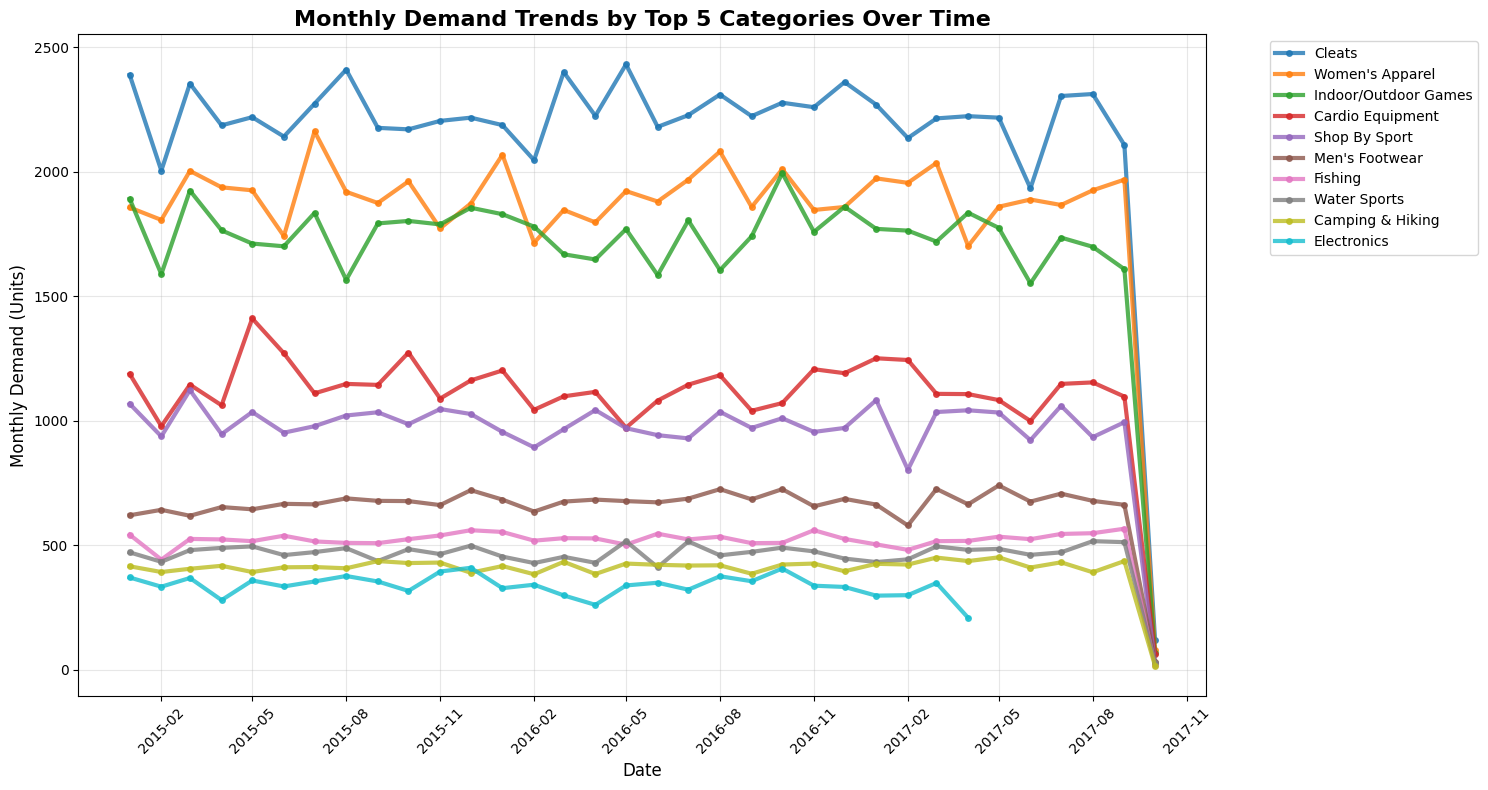

In [58]:
# Graph 1: Monthly Demand Trends by Category (Much Cleaner!)
top_categories = category_summary.head(10)['Category Name'].tolist()
monthly_demand_data = monthly_summary[monthly_summary['Category Name'].isin(top_categories)]

plt.figure(figsize=(15, 8))
for category in top_categories:
    cat_data = monthly_demand_data[monthly_demand_data['Category Name'] == category]
    plt.plot(cat_data['Month_Date'], cat_data['Daily Demand'], 
             label=category, alpha=0.8, linewidth=3, marker='o', markersize=4)

plt.title('Monthly Demand Trends by Top 5 Categories Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Monthly Demand (Units)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Format x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

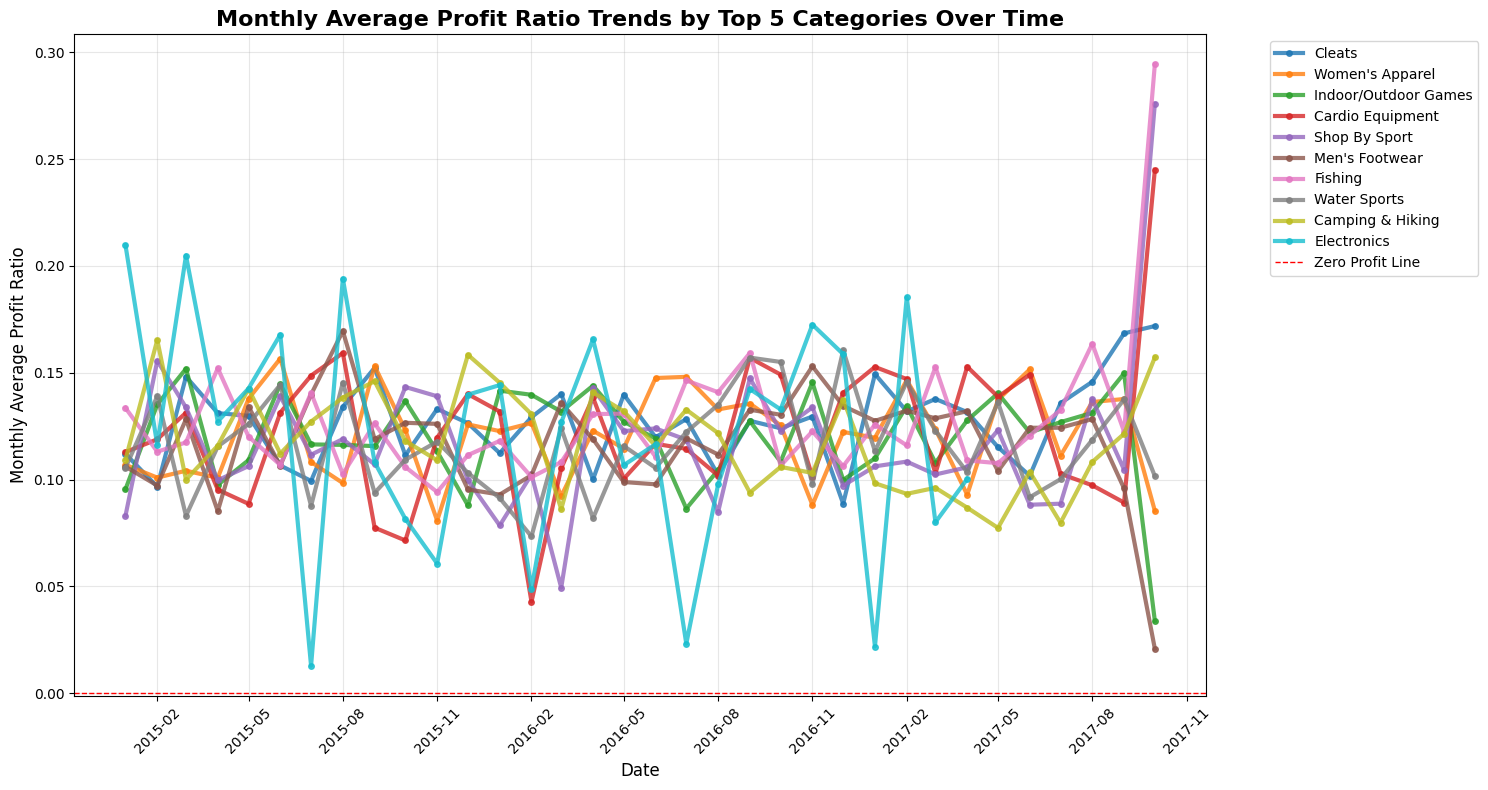

In [59]:
# Graph 2: Monthly Average Profit Ratio Trends (Much Cleaner!)
monthly_profit_data = monthly_summary[monthly_summary['Category Name'].isin(top_categories)]

plt.figure(figsize=(15, 8))
for category in top_categories:
    cat_data = monthly_profit_data[monthly_profit_data['Category Name'] == category]
    plt.plot(cat_data['Month_Date'], cat_data['Avg Profit Ratio'], 
             label=category, alpha=0.8, linewidth=3, marker='o', markersize=4)

plt.title('Monthly Average Profit Ratio Trends by Top 5 Categories Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Monthly Average Profit Ratio', fontsize=12)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Zero Profit Line')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Format x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

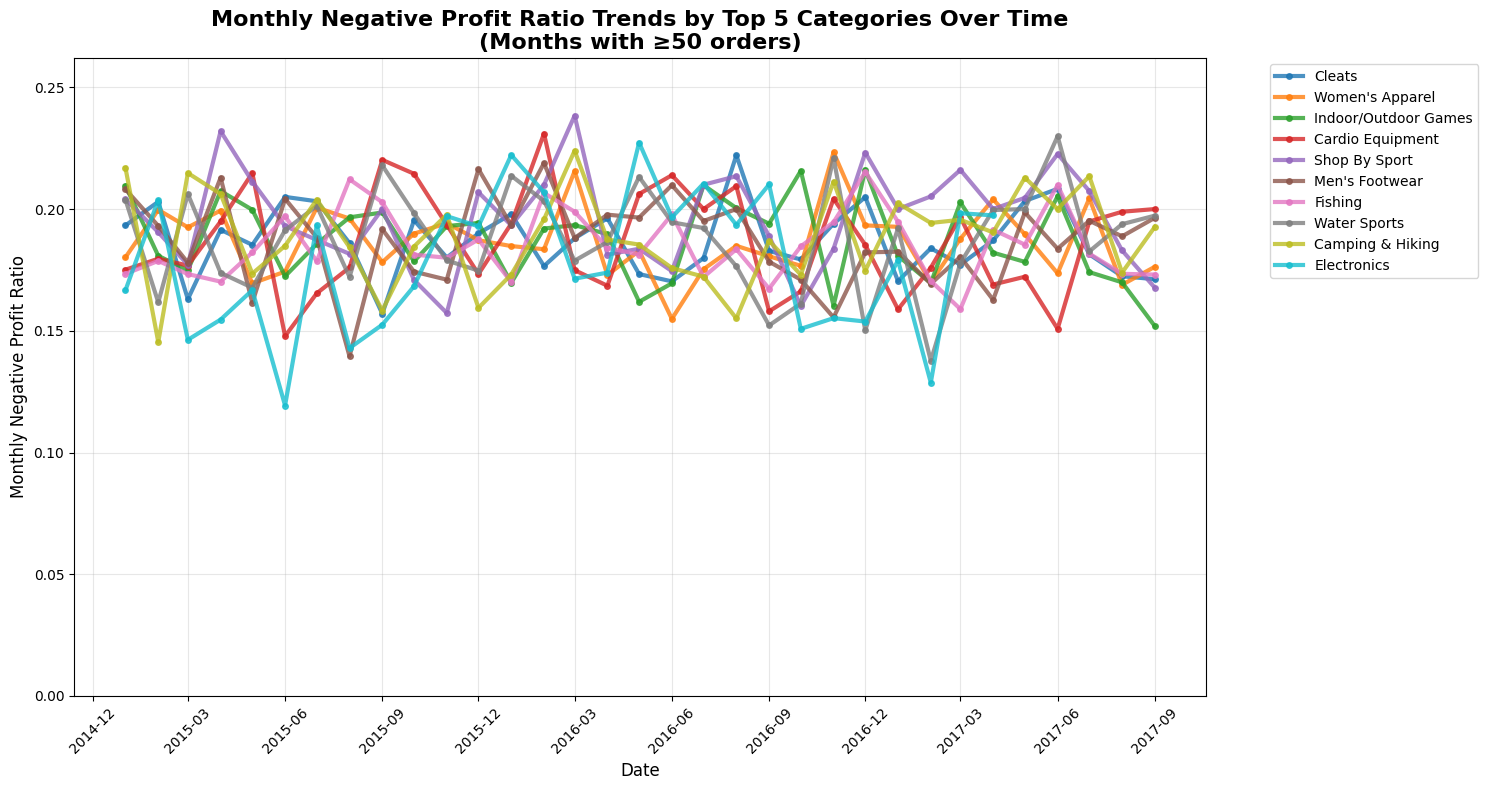

In [60]:
# Graph 3: Monthly Negative Profit Ratio Trends (Much Cleaner!)
# Filter for categories with sufficient monthly orders for meaningful analysis
monthly_filtered_data = monthly_summary[
    (monthly_summary['Category Name'].isin(top_categories)) & 
    (monthly_summary['Total Orders'] >= 50)  # Only include months with at least 50 orders
]

plt.figure(figsize=(15, 8))
for category in top_categories:
    cat_data = monthly_filtered_data[monthly_filtered_data['Category Name'] == category]
    if len(cat_data) > 0:  # Only plot if there's data after filtering
        plt.plot(cat_data['Month_Date'], cat_data['Monthly Negative Profit Ratio'], 
                 label=category, alpha=0.8, linewidth=3, marker='o', markersize=4)

plt.title('Monthly Negative Profit Ratio Trends by Top 5 Categories Over Time\n(Months with ≥50 orders)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Monthly Negative Profit Ratio', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Format x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

# Set reasonable y-axis limits
if len(monthly_filtered_data) > 0:
    plt.ylim(0, min(monthly_filtered_data['Monthly Negative Profit Ratio'].max() * 1.1, 1.0))

plt.tight_layout()
plt.show()

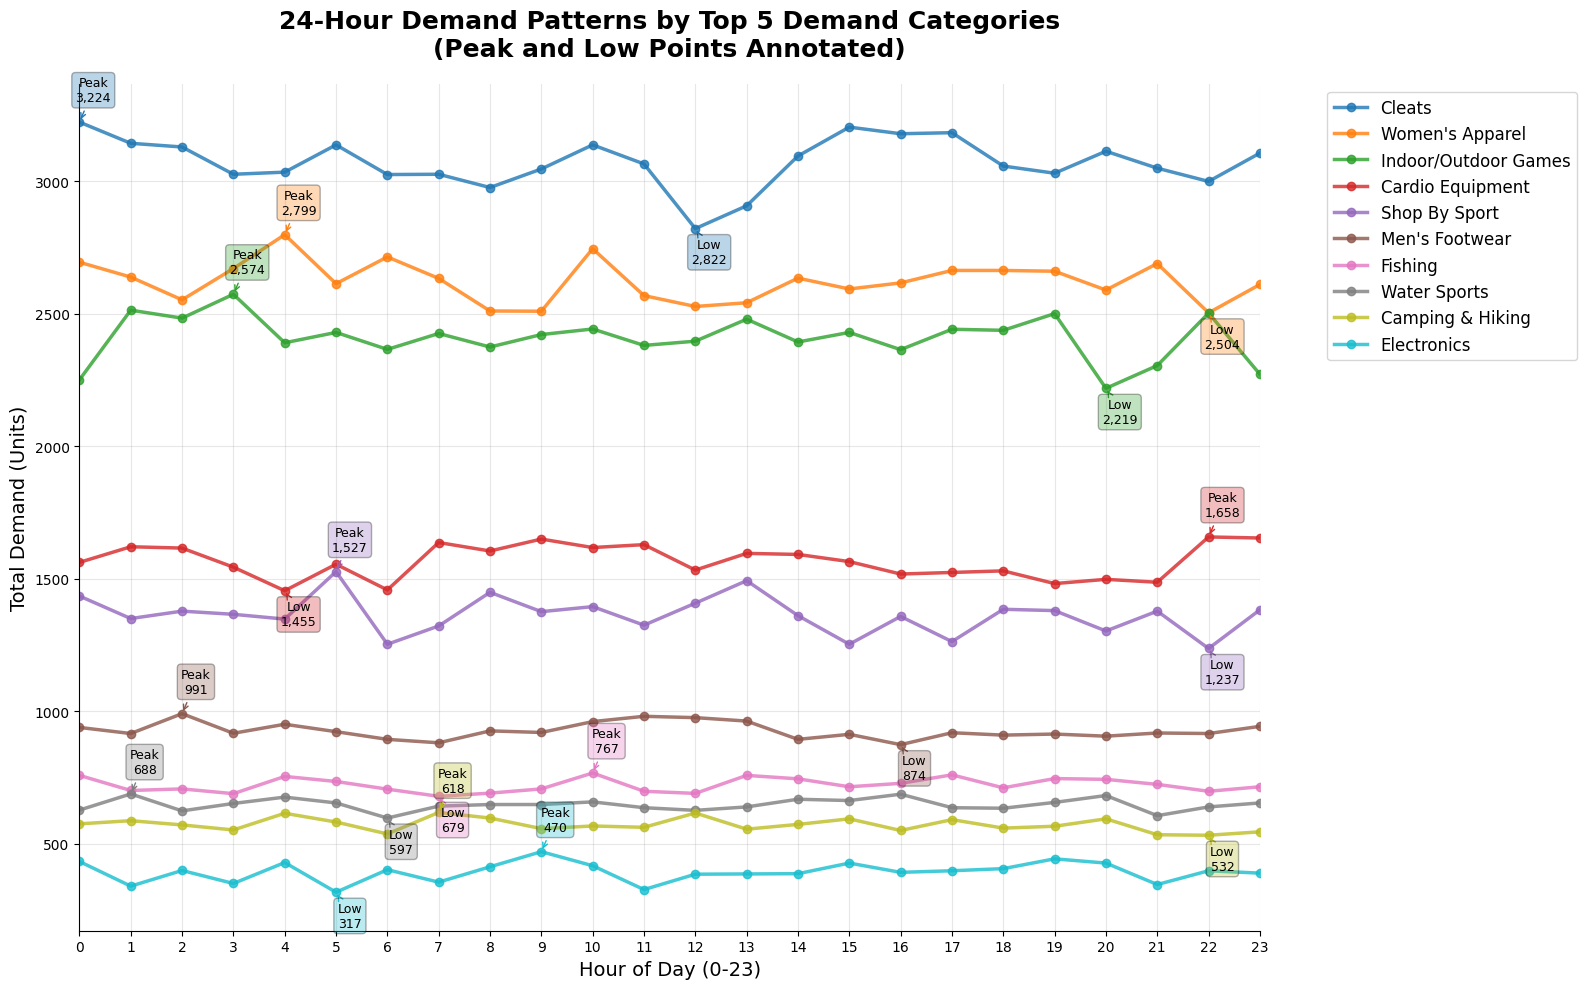

Hourly Demand Insights:
Cleats:
  Peak: 3,224 units at 0:00
  Low: 2,822 units at 12:00

Women's Apparel:
  Peak: 2,799 units at 4:00
  Low: 2,504 units at 22:00

Indoor/Outdoor Games:
  Peak: 2,574 units at 3:00
  Low: 2,219 units at 20:00

Cardio Equipment:
  Peak: 1,658 units at 22:00
  Low: 1,455 units at 4:00

Shop By Sport:
  Peak: 1,527 units at 5:00
  Low: 1,237 units at 22:00

Men's Footwear:
  Peak: 991 units at 2:00
  Low: 874 units at 16:00

Fishing:
  Peak: 767 units at 10:00
  Low: 679 units at 7:00

Water Sports:
  Peak: 688 units at 1:00
  Low: 597 units at 6:00

Camping & Hiking:
  Peak: 618 units at 7:00
  Low: 532 units at 22:00

Electronics:
  Peak: 470 units at 9:00
  Low: 317 units at 5:00



In [63]:
# Hourly Demand Analysis for Top 5 Demand Categories
# First, get the top 5 demand categories
top_demand_categories = category_summary.nlargest(10, 'Total Demand')['Category Name'].tolist()

# Create hourly analysis from the original filtered_data
hourly_data = filtered_data[filtered_data['Category Name'].isin(top_demand_categories)].copy()

# Extract hour from Order Time
hourly_data['Hour'] = pd.to_datetime(hourly_data['Order Time'], format='%H:%M:%S').dt.hour

# Aggregate demand by hour and category
hourly_summary = hourly_data.groupby(['Hour', 'Category Name']).agg({
    'Order Item Quantity': 'sum'  # Total demand per hour per category
}).reset_index()

# Pivot to create a matrix for easier plotting
hourly_pivot = hourly_summary.pivot(index='Hour', columns='Category Name', values='Order Item Quantity').fillna(0)

# Create the 24-hour demand chart with peak and low annotations
plt.figure(figsize=(16, 10))

# Plot each category - extend colors list to handle up to 10 categories
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i, category in enumerate(top_demand_categories):
    if category in hourly_pivot.columns:
        plt.plot(hourly_pivot.index, hourly_pivot[category], 
                marker='o', linewidth=2.5, markersize=6, 
                label=category, color=colors[i], alpha=0.8)
        
        # Find and annotate peak and low points
        peak_hour = hourly_pivot[category].idxmax()
        peak_demand = hourly_pivot[category].max()
        low_hour = hourly_pivot[category].idxmin()
        low_demand = hourly_pivot[category].min()
        
        # Annotate peak point
        plt.annotate(f'Peak\n{peak_demand:,.0f}', 
                    xy=(peak_hour, peak_demand), 
                    xytext=(10, 15), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor=colors[i], alpha=0.3),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color=colors[i]),
                    fontsize=9, ha='center')
        
        # Annotate low point
        plt.annotate(f'Low\n{low_demand:,.0f}', 
                    xy=(low_hour, low_demand), 
                    xytext=(10, -25), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor=colors[i], alpha=0.3),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color=colors[i]),
                    fontsize=9, ha='center')

plt.title('24-Hour Demand Patterns by Top 5 Demand Categories\n(Peak and Low Points Annotated)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Hour of Day (0-23)', fontsize=14)
plt.ylabel('Total Demand (Units)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, alpha=0.3)

# Customize x-axis to show all 24 hours
plt.xticks(range(0, 24))
plt.xlim(0, 23)

# Add some styling
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Print some insights
print("Hourly Demand Insights:")
print("=" * 50)
for category in top_demand_categories:
    if category in hourly_pivot.columns:
        peak_hour = hourly_pivot[category].idxmax()
        peak_demand = hourly_pivot[category].max()
        low_hour = hourly_pivot[category].idxmin()
        low_demand = hourly_pivot[category].min()
        print(f"{category}:")
        print(f"  Peak: {peak_demand:,.0f} units at {peak_hour}:00")
        print(f"  Low: {low_demand:,.0f} units at {low_hour}:00")
        print()

In [45]:
# Create Category-Market Demand Analysis DataFrame
# Aggregate demand by Category Name and Market
category_market_summary = filtered_data.groupby(['Category Name', 'Market']).agg({
    'Order Item Quantity': ['sum', 'count', 'mean'],  # Total demand, number of orders, average order size
    'Order Item Product Price': 'mean',  # Average product price
    'Order Item Profit Ratio': 'mean',  # Average profit ratio
    'Benefit per order': ['mean', lambda x: (x < 0).sum()],  # Average benefit and negative profit count
}).reset_index()

# Flatten column names
category_market_summary.columns = ['Category Name', 'Market', 'Total Demand', 'Order Count', 'Avg Order Size', 
                                  'Avg Product Price', 'Avg Profit Ratio', 'Avg Benefit per Order', 'Negative Profit Orders']

# Calculate additional metrics
category_market_summary['Negative Profit Ratio'] = (category_market_summary['Negative Profit Orders'] / 
                                                   category_market_summary['Order Count']).round(4)

# Round numerical columns for better readability
category_market_summary['Avg Order Size'] = category_market_summary['Avg Order Size'].round(2)
category_market_summary['Avg Product Price'] = category_market_summary['Avg Product Price'].round(2)
category_market_summary['Avg Profit Ratio'] = category_market_summary['Avg Profit Ratio'].round(4)
category_market_summary['Avg Benefit per Order'] = category_market_summary['Avg Benefit per Order'].round(2)

# Sort by total demand descending
category_market_summary = category_market_summary.sort_values('Total Demand', ascending=False).reset_index(drop=True)

print("Category-Market Demand Analysis:")
print("=" * 60)
print(f"Dataset shape: {category_market_summary.shape}")
print(f"Unique categories: {category_market_summary['Category Name'].nunique()}")
print(f"Unique markets: {category_market_summary['Market'].nunique()}")
print("\nTop 15 Category-Market combinations by demand:")
print(category_market_summary.head(15)[['Category Name', 'Market', 'Total Demand', 'Order Count', 'Avg Order Size']])

Category-Market Demand Analysis:
Dataset shape: (162, 10)
Unique categories: 50
Unique markets: 5

Top 15 Category-Market combinations by demand:
           Category Name        Market  Total Demand  Order Count  \
0                 Cleats         LATAM         21881         7280   
1                 Cleats        Europe         20343         6805   
2        Women's Apparel         LATAM         18908         6280   
3        Women's Apparel        Europe         17676         5912   
4   Indoor/Outdoor Games         LATAM         17636         5877   
5   Indoor/Outdoor Games        Europe         15692         5201   
6                 Cleats  Pacific Asia         15289         5081   
7        Women's Apparel  Pacific Asia         12630         4209   
8   Indoor/Outdoor Games  Pacific Asia         12108         4048   
9       Cardio Equipment         LATAM         11346         3759   
10                Cleats          USCA         11246         3723   
11      Cardio Equipment  

In [46]:
# Market-wise Analysis: Total demand by market
market_analysis = category_market_summary.groupby('Market').agg({
    'Total Demand': 'sum',
    'Order Count': 'sum', 
    'Category Name': 'nunique'  # Number of unique categories per market
}).reset_index()
market_analysis.columns = ['Market', 'Total Market Demand', 'Total Orders', 'Unique Categories']
market_analysis = market_analysis.sort_values('Total Market Demand', ascending=False)

print("\nMarket Overview:")
print("=" * 40)
print(market_analysis)

# Category-wise Analysis: Which categories dominate each market
print("\nTop 3 Categories by Market:")
print("=" * 40)
for market in market_analysis['Market']:
    market_data = category_market_summary[category_market_summary['Market'] == market].head(3)
    print(f"\n{market}:")
    for _, row in market_data.iterrows():
        print(f"  {row['Category Name']}: {row['Total Demand']:,} units ({row['Order Count']:,} orders)")

# Market share analysis for top categories
top_5_categories = category_summary.head(5)['Category Name'].tolist()
print(f"\nMarket Distribution for Top 5 Categories:")
print("=" * 50)

market_share_data = []
for category in top_5_categories:
    cat_data = category_market_summary[category_market_summary['Category Name'] == category]
    total_cat_demand = cat_data['Total Demand'].sum()
    
    print(f"\n{category} (Total: {total_cat_demand:,} units):")
    for _, row in cat_data.iterrows():
        market_share = (row['Total Demand'] / total_cat_demand) * 100
        print(f"  {row['Market']}: {row['Total Demand']:,} units ({market_share:.1f}%)")
        market_share_data.append({
            'Category': category,
            'Market': row['Market'],
            'Demand': row['Total Demand'],
            'Market_Share_%': market_share
        })

# Create a pivot table for market share visualization
market_share_df = pd.DataFrame(market_share_data)
market_share_pivot = market_share_df.pivot(index='Category', columns='Market', values='Market_Share_%').fillna(0)

print(f"\nMarket Share Matrix (%) for Top 5 Categories:")
print("=" * 60)
print(market_share_pivot.round(1))


Market Overview:
         Market  Total Market Demand  Total Orders  Unique Categories
2         LATAM               112942         51594                 31
1        Europe               105238         50252                 41
3  Pacific Asia                83680         41260                 42
4          USCA                56616         25799                 24
0        Africa                25603         11614                 24

Top 3 Categories by Market:

LATAM:
  Cleats: 21,881 units (7,280 orders)
  Women's Apparel: 18,908 units (6,280 orders)
  Indoor/Outdoor Games: 17,636 units (5,877 orders)

Europe:
  Cleats: 20,343 units (6,805 orders)
  Women's Apparel: 17,676 units (5,912 orders)
  Indoor/Outdoor Games: 15,692 units (5,201 orders)

Pacific Asia:
  Cleats: 15,289 units (5,081 orders)
  Women's Apparel: 12,630 units (4,209 orders)
  Indoor/Outdoor Games: 12,108 units (4,048 orders)

USCA:
  Cleats: 11,246 units (3,723 orders)
  Women's Apparel: 9,560 units (3,215 orders)

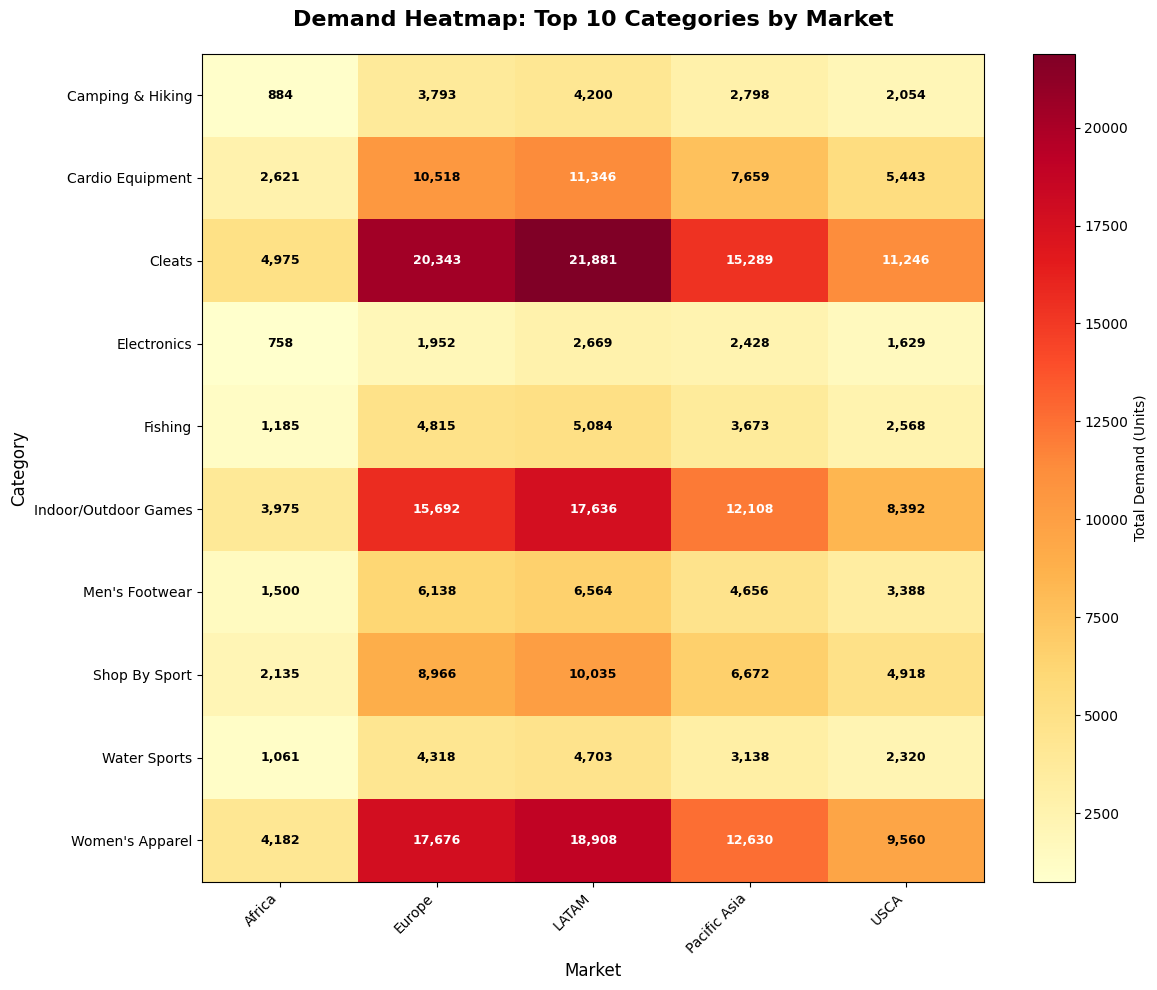


Key Insights:
• Total unique category-market combinations: 162
• Highest demand combination: Cleats in LATAM (21,881 units)
• Average orders per category-market combo: 1114
• Average order size across all combinations: 2.26 units


In [47]:
# Create a heatmap visualization of demand by category and market
# Focus on top 10 categories for better readability
top_10_categories = category_summary.head(10)['Category Name'].tolist()
heatmap_data = category_market_summary[category_market_summary['Category Name'].isin(top_10_categories)]

# Create pivot table for heatmap
demand_heatmap = heatmap_data.pivot(index='Category Name', columns='Market', values='Total Demand').fillna(0)

# Create the heatmap
plt.figure(figsize=(12, 10))
import matplotlib.pyplot as plt

# Create heatmap with color mapping
im = plt.imshow(demand_heatmap.values, cmap='YlOrRd', aspect='auto')

# Set labels
plt.xticks(range(len(demand_heatmap.columns)), demand_heatmap.columns, rotation=45, ha='right')
plt.yticks(range(len(demand_heatmap.index)), demand_heatmap.index)

# Add colorbar
plt.colorbar(im, label='Total Demand (Units)')

# Add text annotations
for i in range(len(demand_heatmap.index)):
    for j in range(len(demand_heatmap.columns)):
        value = demand_heatmap.iloc[i, j]
        if value > 0:
            plt.text(j, i, f'{value:,.0f}', ha='center', va='center', 
                    color='white' if value > demand_heatmap.values.max()/2 else 'black',
                    fontsize=9, fontweight='bold')

plt.title('Demand Heatmap: Top 10 Categories by Market', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Market', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

# Summary statistics
print("\nKey Insights:")
print("=" * 40)
print(f"• Total unique category-market combinations: {len(category_market_summary)}")
print(f"• Highest demand combination: {category_market_summary.iloc[0]['Category Name']} in {category_market_summary.iloc[0]['Market']} ({category_market_summary.iloc[0]['Total Demand']:,} units)")
print(f"• Average orders per category-market combo: {category_market_summary['Order Count'].mean():.0f}")
print(f"• Average order size across all combinations: {category_market_summary['Avg Order Size'].mean():.2f} units")

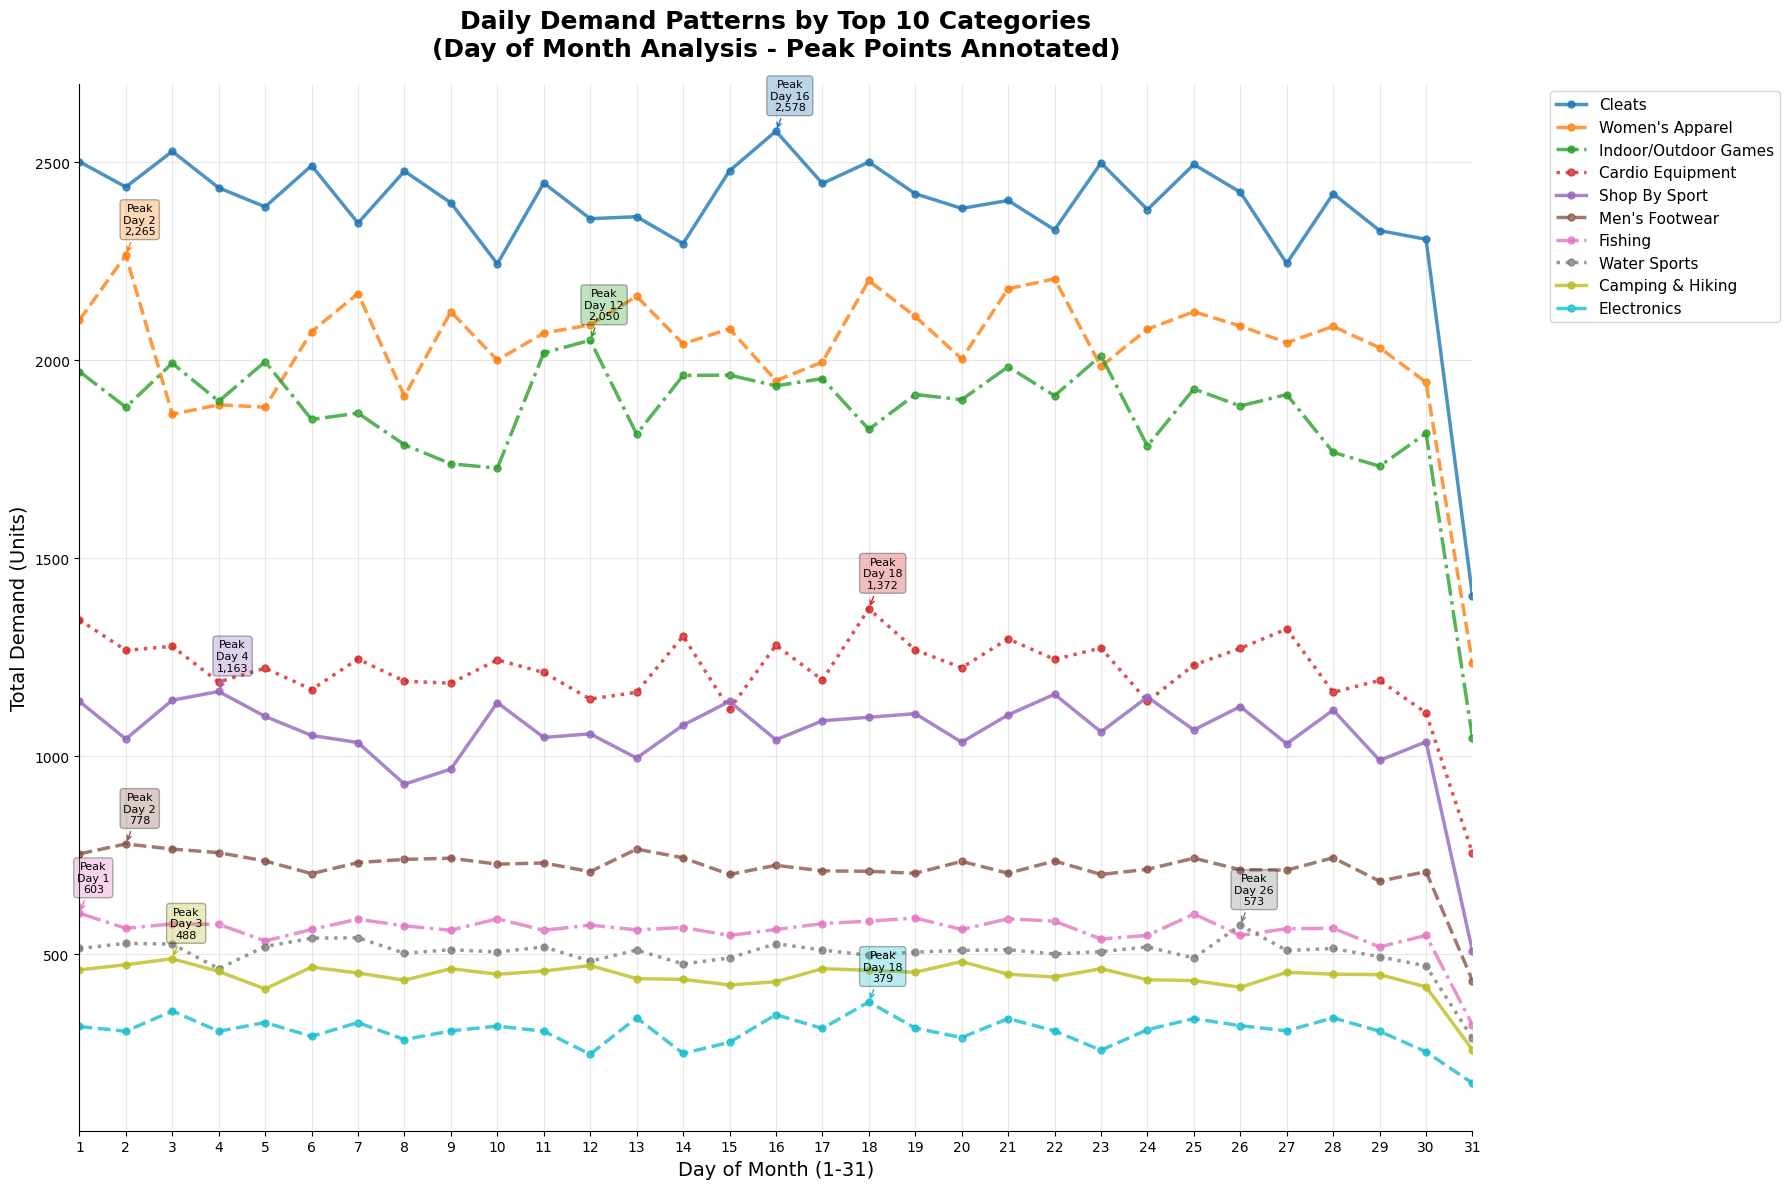


Daily Demand Insights by Day of Month:
Cleats:
  Average daily demand: 2,378.5 units
  Peak: 2,578 units on day 16
  Lowest: 1,404 units on day 31

Women's Apparel:
  Average daily demand: 2,030.8 units
  Peak: 2,265 units on day 2
  Lowest: 1,234 units on day 31

Indoor/Outdoor Games:
  Average daily demand: 1,864.6 units
  Peak: 2,050 units on day 12
  Lowest: 1,045 units on day 31

Cardio Equipment:
  Average daily demand: 1,212.5 units
  Peak: 1,372 units on day 18
  Lowest: 754 units on day 31

Shop By Sport:
  Average daily demand: 1,055.7 units
  Peak: 1,163 units on day 4
  Lowest: 507 units on day 31

Men's Footwear:
  Average daily demand: 717.6 units
  Peak: 778 units on day 2
  Lowest: 433 units on day 31

Fishing:
  Average daily demand: 558.9 units
  Peak: 603 units on day 1
  Lowest: 321 units on day 31

Water Sports:
  Average daily demand: 501.3 units
  Peak: 573 units on day 26
  Lowest: 287 units on day 31

Camping & Hiking:
  Average daily demand: 442.9 units
  Pea

In [67]:
# Daily Demand Analysis by Day of Month for Top 10 Categories
# First, get the top 10 demand categories
top_10_demanded = category_summary.head(10)['Category Name'].tolist()

# Create daily analysis from the original filtered_data
daily_data = filtered_data[filtered_data['Category Name'].isin(top_10_demanded)].copy()

# Convert Order Date to datetime and extract day of month
daily_data['Order Date'] = pd.to_datetime(daily_data['Order Date'])
daily_data['Day_of_Month'] = daily_data['Order Date'].dt.day

# Aggregate demand by day of month and category
daily_summary = daily_data.groupby(['Day_of_Month', 'Category Name']).agg({
    'Order Item Quantity': 'sum'  # Total demand per day of month per category
}).reset_index()

# Pivot to create a matrix for easier plotting
daily_pivot = daily_summary.pivot(index='Day_of_Month', columns='Category Name', values='Order Item Quantity').fillna(0)

# Create the daily demand chart
plt.figure(figsize=(18, 12))

# Plot each category with distinct colors and styles
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']

for i, category in enumerate(top_10_demanded):
    if category in daily_pivot.columns:
        plt.plot(daily_pivot.index, daily_pivot[category], 
                marker='o', linewidth=2.5, markersize=5, 
                label=category, color=colors[i % len(colors)], 
                linestyle=line_styles[i % len(line_styles)], alpha=0.8)
        
        # Find and annotate peak and low points
        peak_day = daily_pivot[category].idxmax()
        peak_demand = daily_pivot[category].max()
        low_day = daily_pivot[category].idxmin()
        low_demand = daily_pivot[category].min()
        
        # Annotate peak point
        plt.annotate(f'Peak\nDay {peak_day}\n{peak_demand:,.0f}', 
                    xy=(peak_day, peak_demand), 
                    xytext=(10, 15), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor=colors[i % len(colors)], alpha=0.3),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color=colors[i % len(colors)]),
                    fontsize=8, ha='center')
        


plt.title('Daily Demand Patterns by Top 10 Categories\n(Day of Month Analysis - Peak Points Annotated)', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Day of Month (1-31)', fontsize=14)
plt.ylabel('Total Demand (Units)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3)

# Customize x-axis to show all days of month
plt.xticks(range(1, 32))
plt.xlim(1, 31)

# Add some styling
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Print some insights about daily patterns
print("\nDaily Demand Insights by Day of Month:")
print("=" * 60)

# Calculate average demand per day of month for each category
for category in top_10_demanded:
    if category in daily_pivot.columns:
        avg_demand = daily_pivot[category].mean()
        peak_day = daily_pivot[category].idxmax()
        peak_demand = daily_pivot[category].max()
        low_day = daily_pivot[category].idxmin()
        low_demand = daily_pivot[category].min()
        
        print(f"{category}:")
        print(f"  Average daily demand: {avg_demand:,.1f} units")
        print(f"  Peak: {peak_demand:,.0f} units on day {peak_day}")
        print(f"  Lowest: {low_demand:,.0f} units on day {low_day}")
        print()

# Calculate overall statistics
print("Overall Daily Patterns:")
print("=" * 30)
overall_daily = daily_pivot.sum(axis=1)
peak_overall_day = overall_daily.idxmax()
low_overall_day = overall_daily.idxmin()
print(f"Highest total demand day: Day {peak_overall_day} ({overall_daily[peak_overall_day]:,.0f} total units)")
print(f"Lowest total demand day: Day {low_overall_day} ({overall_daily[low_overall_day]:,.0f} total units)")
print(f"Average daily demand across all categories: {overall_daily.mean():,.1f} units")

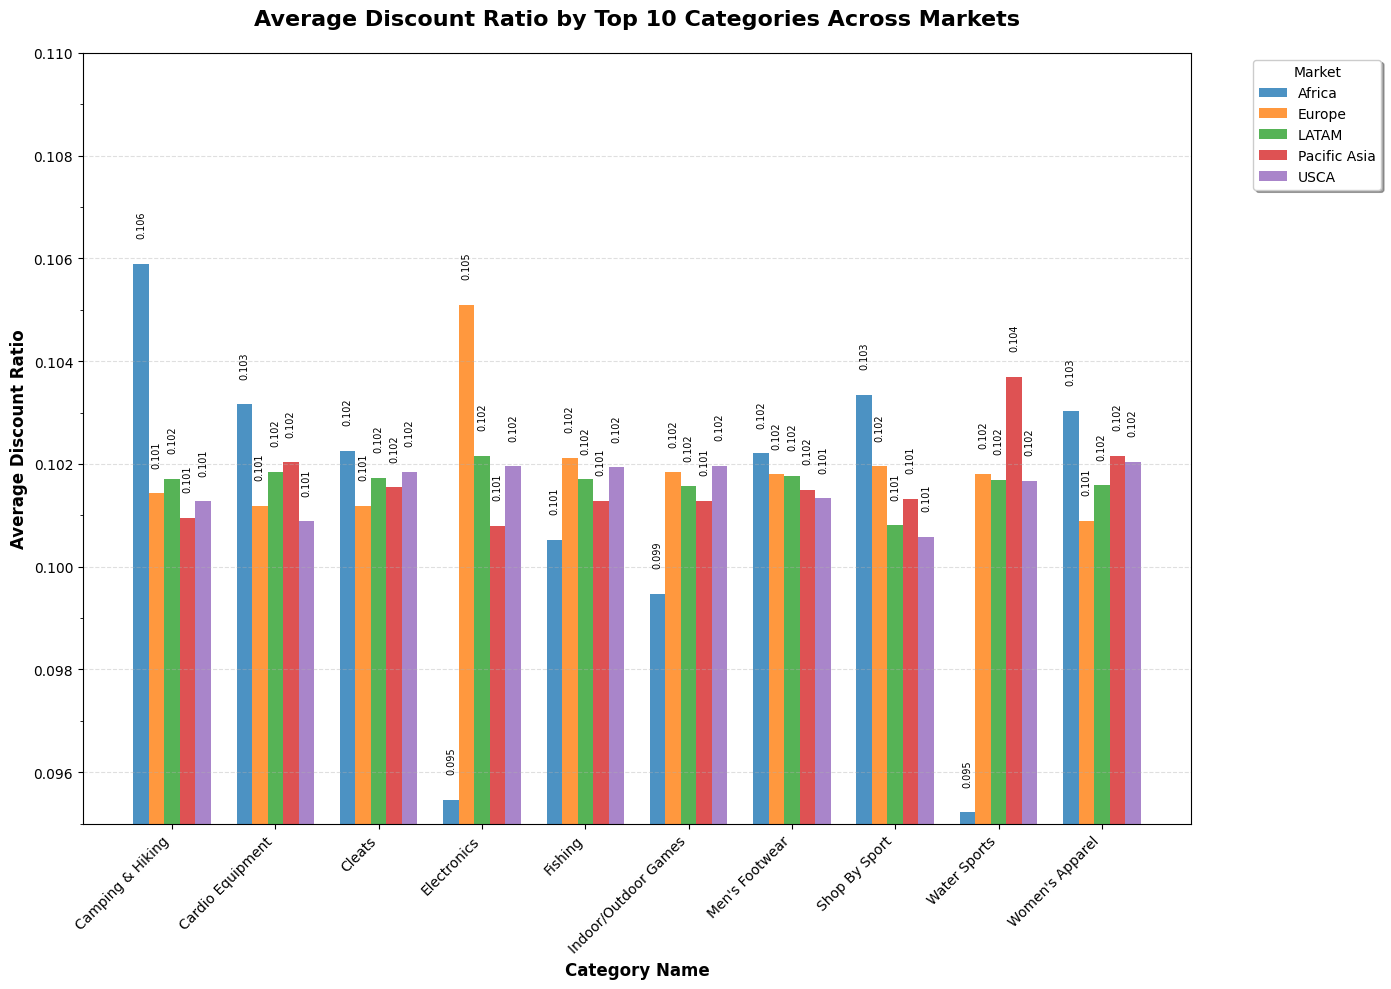

Discount Ratio Analysis by Market and Category:

Africa Market:
  Highest discount: Camping & Hiking (0.1059)
  Average discount: 0.1011
  Categories with discounts: 10

Europe Market:
  Highest discount: Electronics (0.1051)
  Average discount: 0.1019
  Categories with discounts: 10

LATAM Market:
  Highest discount: Electronics (0.1022)
  Average discount: 0.1017
  Categories with discounts: 10

Pacific Asia Market:
  Highest discount: Water Sports (0.1037)
  Average discount: 0.1017
  Categories with discounts: 10

USCA Market:
  Highest discount: Women's Apparel (0.1020)
  Average discount: 0.1015
  Categories with discounts: 10

Overall Discount Insights:
  Highest overall discount: 0.1059
  Average discount across all combinations: 0.1016
  Most active discount market: Europe (total: 1.0193)


In [80]:
# Graph 1: Average Discount Ratio of Top 10 Categories by Market
# Get top 10 categories by total demand
top_10_categories = category_summary.head(10)['Category Name'].tolist()

# Create discount analysis from original filtered_data
discount_analysis = filtered_data[filtered_data['Category Name'].isin(top_10_categories)].groupby(['Category Name', 'Market']).agg({
    'Order Item Discount Rate': 'mean'  # Average discount rate per category-market combination
}).reset_index()

# Rename column for clarity
discount_analysis.columns = ['Category Name', 'Market', 'Avg Discount Rate']

# Create pivot table for discount ratios
discount_pivot = discount_analysis.pivot(index='Category Name', columns='Market', values='Avg Discount Rate').fillna(0)

# Create the discount ratio visualization
plt.figure(figsize=(14, 10))

# Create bar chart
x_pos = np.arange(len(discount_pivot.index))
width = 0.15  # Width of bars
markets = discount_pivot.columns
colors_market = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, market in enumerate(markets):
    plt.bar(x_pos + i * width, discount_pivot[market], width, 
           label=market, color=colors_market[i % len(colors_market)], alpha=0.8)

plt.title('Average Discount Ratio by Top 10 Categories Across Markets', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Category Name', fontsize=12, fontweight='bold')
plt.ylabel('Average Discount Ratio', fontsize=12, fontweight='bold')
plt.xticks(x_pos + width * 2, discount_pivot.index, rotation=45, ha='right', fontsize=10)
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, fancybox=True, shadow=True)
plt.grid(True, alpha=0.4, axis='y', linestyle='--')

# Add value annotations
for i, market in enumerate(markets):
    for j, value in enumerate(discount_pivot[market]):
        if value > 0:  # Only annotate non-zero values
            plt.text(j + i * width, value + 0.0005, f'{value:.3f}', 
                    ha='center', va='bottom', fontsize=7, rotation=90)

# Improve y-axis readability
plt.ylim(0.095, 0.110)  # Focus on the actual data range
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.002))  # Y-axis ticks every 0.002
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.001))  # Minor ticks every 0.001
plt.gca().tick_params(axis='y', which='major', labelsize=10)

plt.tight_layout()
plt.show()

# Print insights
print("Discount Ratio Analysis by Market and Category:")
print("=" * 60)
for market in markets:
    print(f"\n{market} Market:")
    market_discounts = discount_pivot[market].sort_values(ascending=False)
    market_discounts_filtered = market_discounts[market_discounts > 0]
    if len(market_discounts_filtered) > 0:
        print(f"  Highest discount: {market_discounts_filtered.index[0]} ({market_discounts_filtered.iloc[0]:.4f})")
        print(f"  Average discount: {market_discounts_filtered.mean():.4f}")
        print(f"  Categories with discounts: {len(market_discounts_filtered)}")
    else:
        print("  No discount data available")

# Overall insights
print(f"\nOverall Discount Insights:")
print(f"  Highest overall discount: {discount_pivot.max().max():.4f}")
print(f"  Average discount across all combinations: {discount_pivot[discount_pivot > 0].stack().mean():.4f}")
print(f"  Most active discount market: {discount_pivot.sum().idxmax()} (total: {discount_pivot.sum().max():.4f})")

In [69]:
# Check the column names in category_market_summary
print("Available columns in category_market_summary:")
print(category_market_summary.columns.tolist())
print(f"\nDataset shape: {category_market_summary.shape}")
print("\nSample data:")
print(category_market_summary.head())

Available columns in category_market_summary:
['Category Name', 'Market', 'Total Demand', 'Order Count', 'Avg Order Size', 'Avg Product Price', 'Avg Profit Ratio', 'Avg Benefit per Order', 'Negative Profit Orders', 'Negative Profit Ratio']

Dataset shape: (162, 10)

Sample data:
          Category Name  Market  Total Demand  Order Count  Avg Order Size  \
0                Cleats   LATAM         21881         7280            3.01   
1                Cleats  Europe         20343         6805            2.99   
2       Women's Apparel   LATAM         18908         6280            3.01   
3       Women's Apparel  Europe         17676         5912            2.99   
4  Indoor/Outdoor Games   LATAM         17636         5877            3.00   

   Avg Product Price  Avg Profit Ratio  Avg Benefit per Order  \
0              59.99            0.1253                  20.54   
1              61.26            0.1297                  21.69   
2              50.00            0.1182                  

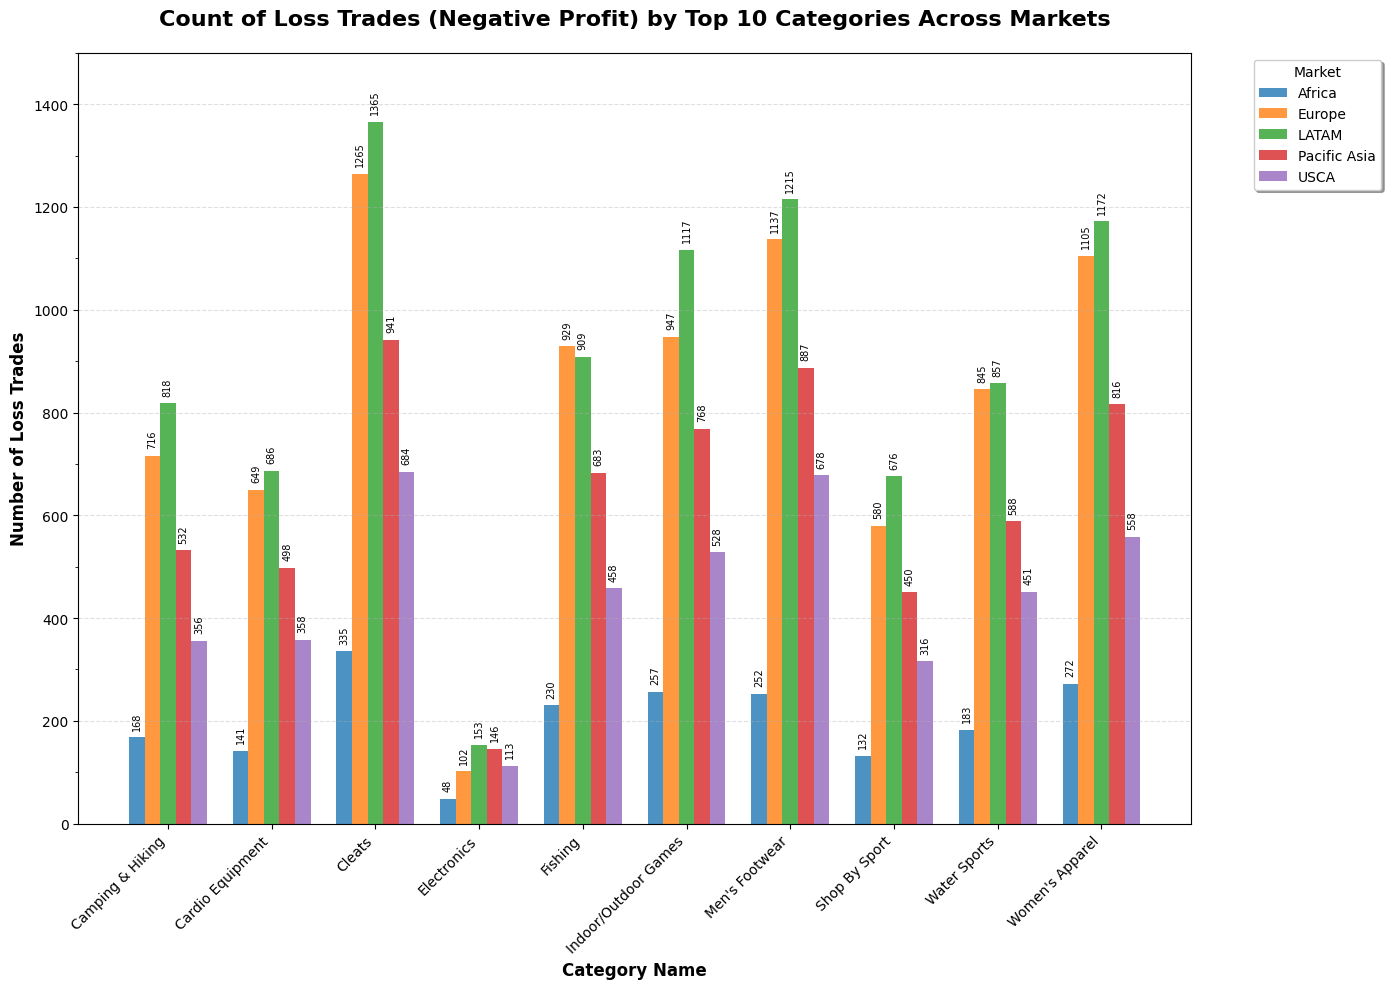

Loss Trades Analysis by Market and Category:

Africa Market:
  Highest loss trades: Cleats (335 trades)
  Total loss trades: 2018
  Average per category: 201.8
  Categories with losses: 10

Europe Market:
  Highest loss trades: Cleats (1265 trades)
  Total loss trades: 8275
  Average per category: 827.5
  Categories with losses: 10

LATAM Market:
  Highest loss trades: Cleats (1365 trades)
  Total loss trades: 8968
  Average per category: 896.8
  Categories with losses: 10

Pacific Asia Market:
  Highest loss trades: Cleats (941 trades)
  Total loss trades: 6309
  Average per category: 630.9
  Categories with losses: 10

USCA Market:
  Highest loss trades: Cleats (684 trades)
  Total loss trades: 4500
  Average per category: 450.0
  Categories with losses: 10

Loss Trade Ratios by Market:
  Africa: 18.60% (2018/10852 orders)
  Europe: 18.75% (8275/44144 orders)
  LATAM: 18.69% (8968/47985 orders)
  Pacific Asia: 18.97% (6309/33255 orders)
  USCA: 18.66% (4500/24115 orders)

Overall Los

In [81]:
# Graph 2: Count of Loss Trades (Negative Profit) by Top 10 Categories in Each Market
# Use the same top 10 categories and filter for loss trades
loss_data = category_market_summary[category_market_summary['Category Name'].isin(top_10_categories)]

# Create pivot table for negative profit orders (loss trades)
loss_pivot = loss_data.pivot(index='Category Name', columns='Market', values='Negative Profit Orders').fillna(0)

# Create the loss trades visualization
plt.figure(figsize=(14, 10))

# Create bar chart
x_pos = np.arange(len(loss_pivot.index))
width = 0.15  # Width of bars
markets = loss_pivot.columns

for i, market in enumerate(markets):
    plt.bar(x_pos + i * width, loss_pivot[market], width, 
           label=market, color=colors_market[i % len(colors_market)], alpha=0.8)

plt.title('Count of Loss Trades (Negative Profit) by Top 10 Categories Across Markets', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Category Name', fontsize=12, fontweight='bold')
plt.ylabel('Number of Loss Trades', fontsize=12, fontweight='bold')
plt.xticks(x_pos + width * 2, loss_pivot.index, rotation=45, ha='right', fontsize=10)
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, fancybox=True, shadow=True)
plt.grid(True, alpha=0.4, axis='y', linestyle='--')

# Add value annotations
for i, market in enumerate(markets):
    for j, value in enumerate(loss_pivot[market]):
        if value > 0:  # Only annotate non-zero values
            plt.text(j + i * width, value + 15, f'{int(value)}', 
                    ha='center', va='bottom', fontsize=7, rotation=90)

# Improve y-axis readability
plt.ylim(0, 1500)  # Set a reasonable upper limit
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(200))  # Y-axis ticks every 200
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(100))  # Minor ticks every 100
plt.gca().tick_params(axis='y', which='major', labelsize=10)

plt.tight_layout()
plt.show()

# Print insights
print("Loss Trades Analysis by Market and Category:")
print("=" * 60)
for market in markets:
    print(f"\n{market} Market:")
    market_losses = loss_pivot[market].sort_values(ascending=False)
    market_losses_filtered = market_losses[market_losses > 0]
    if len(market_losses_filtered) > 0:
        print(f"  Highest loss trades: {market_losses_filtered.index[0]} ({int(market_losses_filtered.iloc[0])} trades)")
        print(f"  Total loss trades: {int(market_losses_filtered.sum())}")
        print(f"  Average per category: {market_losses_filtered.mean():.1f}")
        print(f"  Categories with losses: {len(market_losses_filtered)}")
    else:
        print("  No loss trades recorded")

# Calculate loss trade ratios
print(f"\nLoss Trade Ratios by Market:")
print("=" * 30)
for market in markets:
    if market in loss_data['Market'].values:
        market_data = loss_data[loss_data['Market'] == market]
        total_orders = market_data['Order Count'].sum()
        total_losses = market_data['Negative Profit Orders'].sum()
        loss_ratio = (total_losses / total_orders * 100) if total_orders > 0 else 0
        print(f"  {market}: {loss_ratio:.2f}% ({int(total_losses)}/{int(total_orders)} orders)")

# Overall insights
print(f"\nOverall Loss Trade Insights:")
total_loss_trades = loss_pivot.sum().sum()
most_risky_category = loss_pivot.sum(axis=1).idxmax()
most_risky_market = loss_pivot.sum().idxmax()
print(f"  Total loss trades across all combinations: {int(total_loss_trades)}")
print(f"  Riskiest category overall: {most_risky_category} ({int(loss_pivot.sum(axis=1).max())} total losses)")
print(f"  Riskiest market overall: {most_risky_market} ({int(loss_pivot.sum().max())} total losses)")

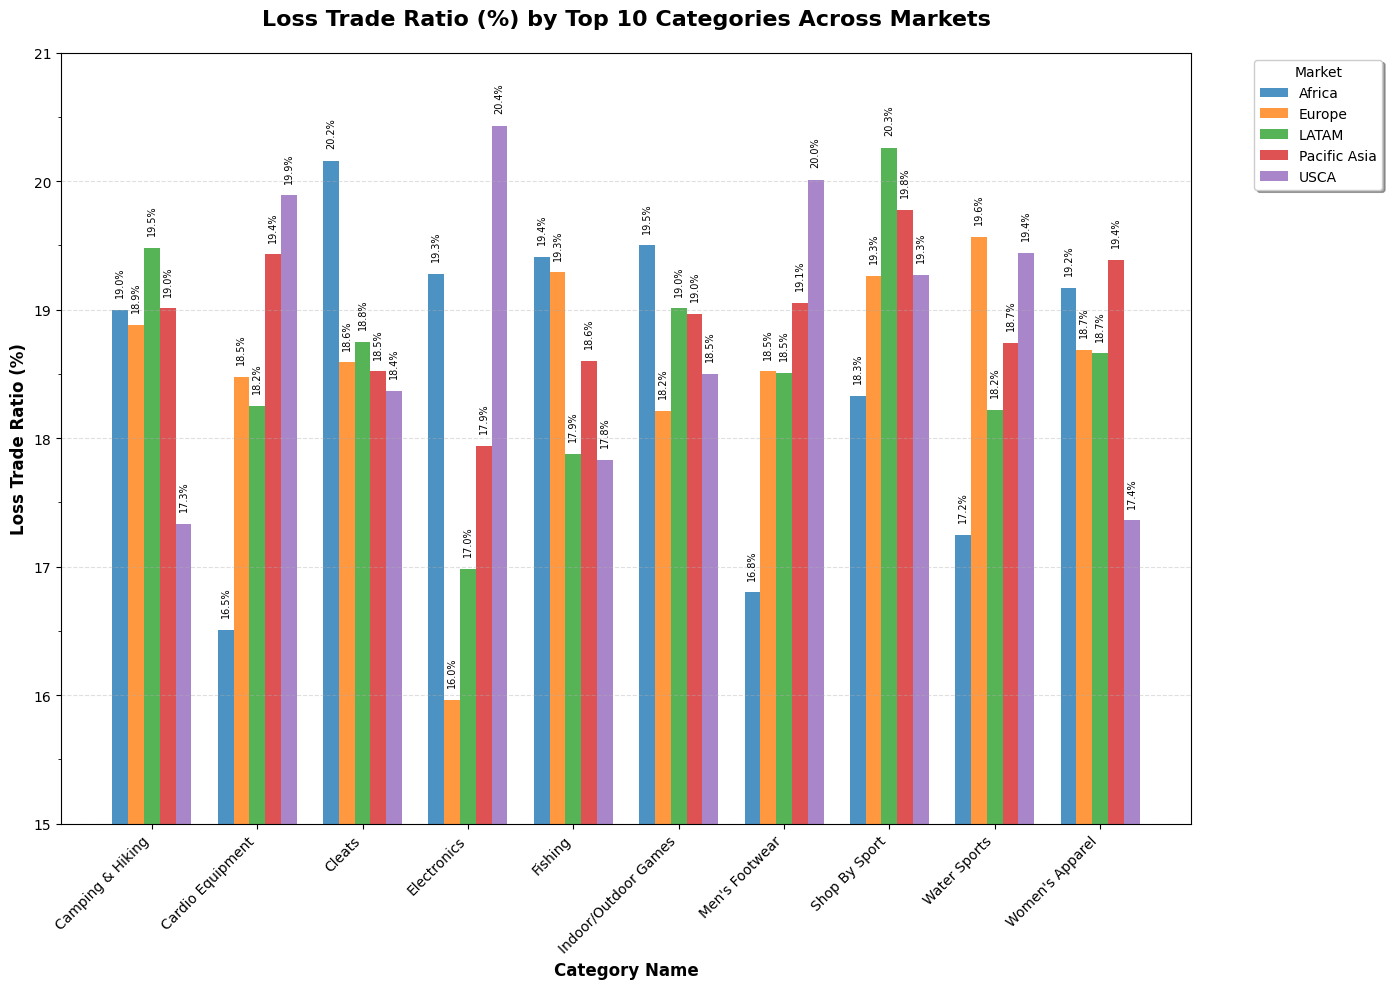

Loss Trade Ratio Analysis by Market and Category:

Africa Market:
  Highest loss ratio: Cleats (20.16%)
  Average loss ratio: 18.54%
  Lowest loss ratio: Cardio Equipment (16.51%)
  Range: 3.65 percentage points

Europe Market:
  Highest loss ratio: Water Sports (19.57%)
  Average loss ratio: 18.54%
  Lowest loss ratio: Electronics (15.96%)
  Range: 3.61 percentage points

LATAM Market:
  Highest loss ratio: Shop By Sport (20.26%)
  Average loss ratio: 18.60%
  Lowest loss ratio: Electronics (16.98%)
  Range: 3.28 percentage points

Pacific Asia Market:
  Highest loss ratio: Shop By Sport (19.78%)
  Average loss ratio: 18.94%
  Lowest loss ratio: Electronics (17.94%)
  Range: 1.84 percentage points

USCA Market:
  Highest loss ratio: Electronics (20.43%)
  Average loss ratio: 18.84%
  Lowest loss ratio: Camping & Hiking (17.33%)
  Range: 3.10 percentage points

Risk Assessment by Category:
Categories ranked by average loss ratio across all markets:
   1. Shop By Sport: 19.38% [HIGH RIS

In [82]:
# Graph 3: Loss Trade Ratio (Negative Profit Percentage) by Top 10 Categories in Each Market
# Use the existing category_market_summary data for top 10 categories
ratio_data = category_market_summary[category_market_summary['Category Name'].isin(top_10_categories)]

# Create pivot table for negative profit ratios (loss trade ratios)
ratio_pivot = ratio_data.pivot(index='Category Name', columns='Market', values='Negative Profit Ratio').fillna(0)

# Create the loss trade ratio visualization
plt.figure(figsize=(14, 10))

# Create bar chart
x_pos = np.arange(len(ratio_pivot.index))
width = 0.15  # Width of bars
markets = ratio_pivot.columns

for i, market in enumerate(markets):
    plt.bar(x_pos + i * width, ratio_pivot[market] * 100, width,  # Convert to percentage
           label=market, color=colors_market[i % len(colors_market)], alpha=0.8)

plt.title('Loss Trade Ratio (%) by Top 10 Categories Across Markets', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Category Name', fontsize=12, fontweight='bold')
plt.ylabel('Loss Trade Ratio (%)', fontsize=12, fontweight='bold')
plt.xticks(x_pos + width * 2, ratio_pivot.index, rotation=45, ha='right', fontsize=10)
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, fancybox=True, shadow=True)
plt.grid(True, alpha=0.4, axis='y', linestyle='--')

# Add value annotations
for i, market in enumerate(markets):
    for j, value in enumerate(ratio_pivot[market] * 100):  # Convert to percentage
        if value > 0:  # Only annotate non-zero values
            plt.text(j + i * width, value + 0.1, f'{value:.1f}%', 
                    ha='center', va='bottom', fontsize=7, rotation=90)

# Improve y-axis readability
plt.ylim(15, 21)  # Focus on the actual data range (15-21%)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1.0))  # Y-axis ticks every 1%
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.5))  # Minor ticks every 0.5%
plt.gca().tick_params(axis='y', which='major', labelsize=10)

plt.tight_layout()
plt.show()

# Print insights
print("Loss Trade Ratio Analysis by Market and Category:")
print("=" * 60)
for market in markets:
    print(f"\n{market} Market:")
    market_ratios = ratio_pivot[market].sort_values(ascending=False)
    market_ratios_filtered = market_ratios[market_ratios > 0]
    if len(market_ratios_filtered) > 0:
        print(f"  Highest loss ratio: {market_ratios_filtered.index[0]} ({market_ratios_filtered.iloc[0]*100:.2f}%)")
        print(f"  Average loss ratio: {market_ratios_filtered.mean()*100:.2f}%")
        print(f"  Lowest loss ratio: {market_ratios_filtered.index[-1]} ({market_ratios_filtered.iloc[-1]*100:.2f}%)")
        print(f"  Range: {(market_ratios_filtered.max() - market_ratios_filtered.min())*100:.2f} percentage points")
    else:
        print("  No loss ratio data available")

# Overall insights and risk assessment
print(f"\nRisk Assessment by Category:")
print("=" * 40)
category_avg_ratios = ratio_pivot.mean(axis=1).sort_values(ascending=False)
print("Categories ranked by average loss ratio across all markets:")
for i, (category, avg_ratio) in enumerate(category_avg_ratios.items(), 1):
    risk_level = "HIGH" if avg_ratio > 0.19 else "MEDIUM" if avg_ratio > 0.18 else "LOW"
    print(f"  {i:2d}. {category}: {avg_ratio*100:.2f}% [{risk_level} RISK]")

print(f"\nMarket Risk Profile:")
print("=" * 25)
market_avg_ratios = ratio_pivot.mean().sort_values(ascending=False)
for i, (market, avg_ratio) in enumerate(market_avg_ratios.items(), 1):
    risk_level = "HIGH" if avg_ratio > 0.19 else "MEDIUM" if avg_ratio > 0.186 else "LOW"
    print(f"  {i}. {market}: {avg_ratio*100:.2f}% [{risk_level} RISK]")

# Statistical insights
print(f"\nStatistical Summary:")
print("=" * 25)
all_ratios = ratio_pivot.values.flatten()
all_ratios = ratio_pivot.values.flatten()
all_ratios = all_ratios[all_ratios > 0]  # Remove zeros
print(f"  Overall average loss ratio: {all_ratios.mean()*100:.2f}%")
print(f"  Standard deviation: {all_ratios.std()*100:.2f} percentage points")
print(f"  Range: {all_ratios.min()*100:.2f}% - {all_ratios.max()*100:.2f}%")
print(f"  Categories/Markets above 19%: {len(all_ratios[all_ratios > 0.19])}/{len(all_ratios)}")

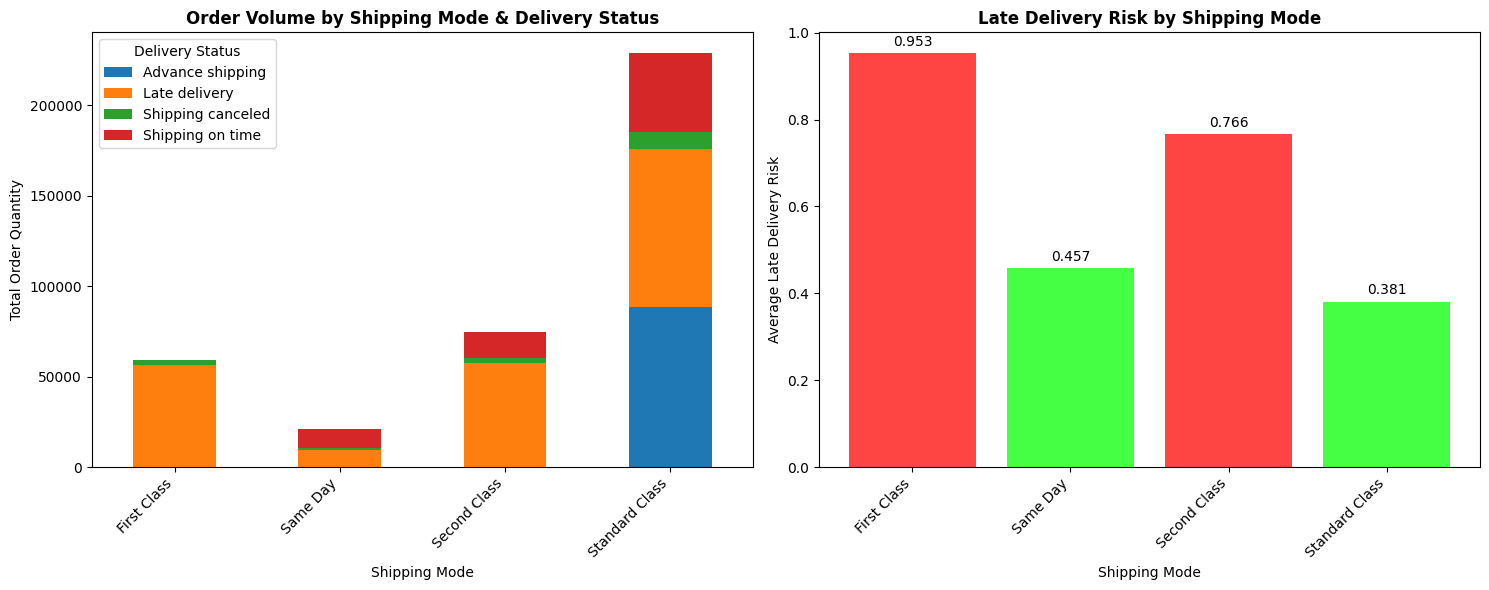

In [83]:
# Additional Graph Ideas for Better Dataset Overview

# 1. SHIPPING MODE ANALYSIS
# Analyze delivery performance and preferences by shipping mode
shipping_analysis = filtered_data.groupby(['Shipping Mode', 'Delivery Status']).agg({
    'Order Item Quantity': 'sum',
    'Late_delivery_risk': 'mean',
    'Order Item Product Price': 'mean',
    'Order Item Profit Ratio': 'mean'
}).reset_index()

# Shipping Mode Performance
plt.figure(figsize=(15, 6))

# Subplot 1: Delivery Status by Shipping Mode
plt.subplot(1, 2, 1)
shipping_status = filtered_data.pivot_table(
    values='Order Item Quantity', 
    index='Shipping Mode', 
    columns='Delivery Status', 
    aggfunc='sum', 
    fill_value=0
)
shipping_status.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Order Volume by Shipping Mode & Delivery Status', fontweight='bold')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Delivery Status')

# Subplot 2: Late Delivery Risk by Shipping Mode
plt.subplot(1, 2, 2)
late_risk_by_mode = filtered_data.groupby('Shipping Mode')['Late_delivery_risk'].mean()
bars = plt.bar(late_risk_by_mode.index, late_risk_by_mode.values, 
               color=['#ff4444' if x > 0.5 else '#44ff44' for x in late_risk_by_mode.values])
plt.title('Late Delivery Risk by Shipping Mode', fontweight='bold')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Late Delivery Risk')
plt.xticks(rotation=45, ha='right')
# Add value labels on bars
for bar, value in zip(bars, late_risk_by_mode.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

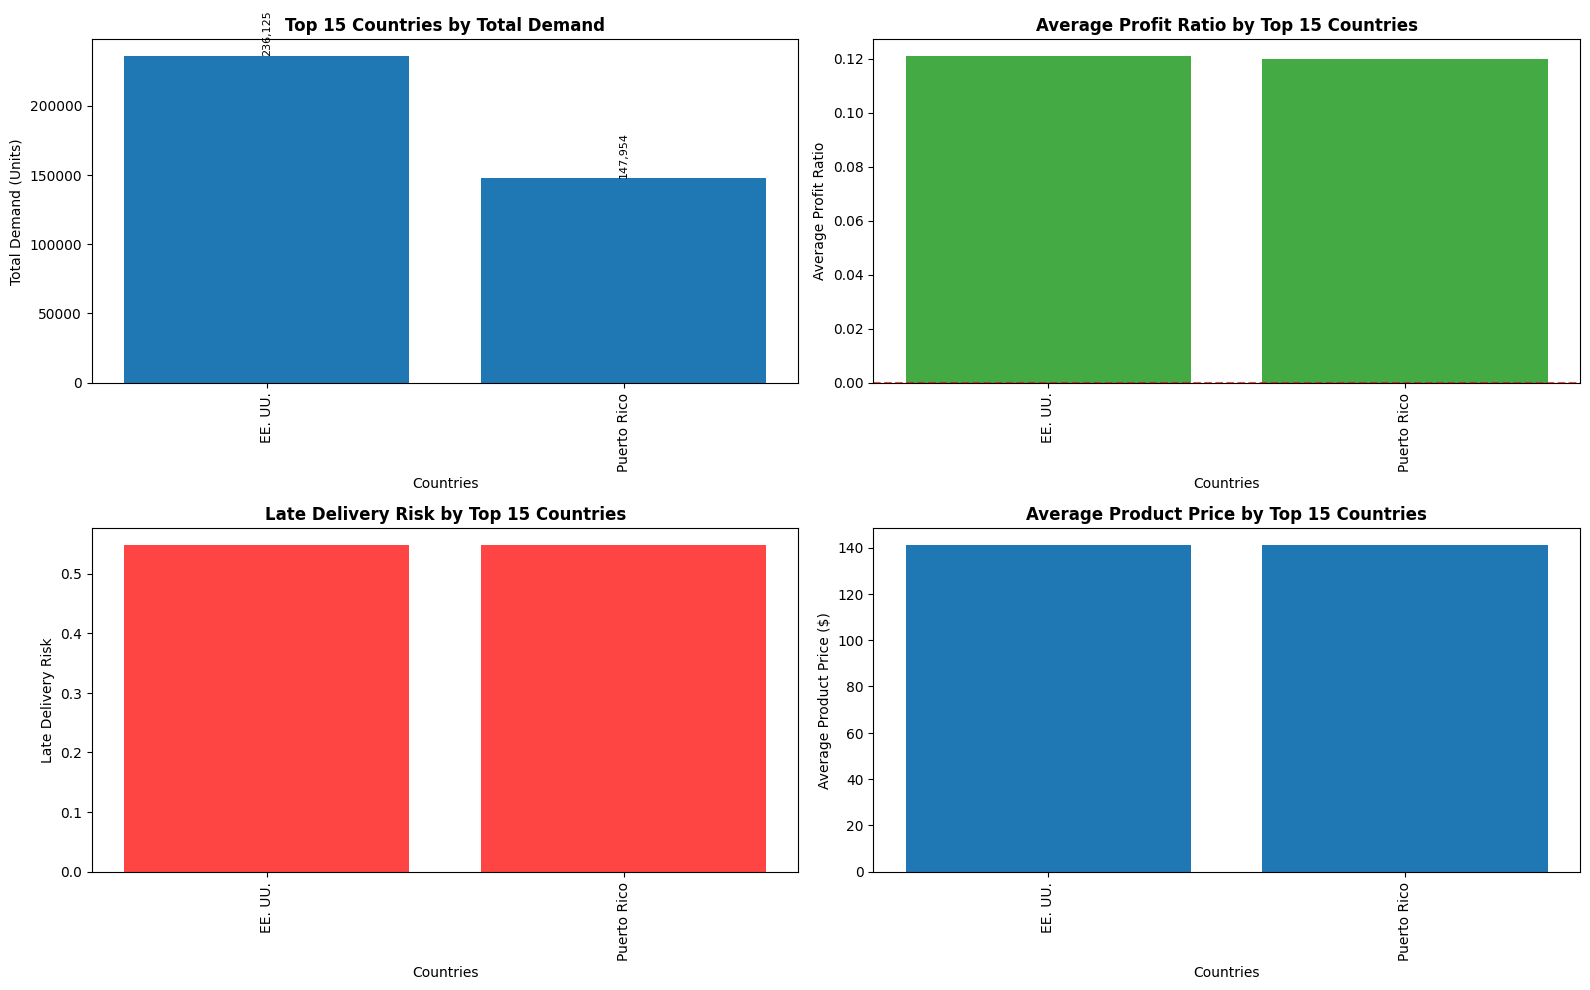

Country Analysis Insights:
Highest demand country: EE. UU. (236,125 units)
Most profitable country: EE. UU. (0.1211 profit ratio)
Riskiest country for delays: EE. UU. (0.549 risk)


In [85]:
# 2. CUSTOMER GEOGRAPHICAL ANALYSIS
# Analyze demand patterns and performance by customer country

# Top 15 countries by demand
country_analysis = filtered_data.groupby('Customer Country').agg({
    'Order Item Quantity': 'sum',
    'Order Item Product Price': 'mean',
    'Order Item Profit Ratio': 'mean',
    'Late_delivery_risk': 'mean'
}).reset_index()
country_analysis = country_analysis.sort_values('Order Item Quantity', ascending=False)
top_countries = country_analysis.head(15)

plt.figure(figsize=(16, 10))

# Subplot 1: Top Countries by Total Demand
plt.subplot(2, 2, 1)
bars = plt.bar(range(len(top_countries)), top_countries['Order Item Quantity'])
plt.title('Top 15 Countries by Total Demand', fontweight='bold')
plt.xlabel('Countries')
plt.ylabel('Total Demand (Units)')
plt.xticks(range(len(top_countries)), top_countries['Customer Country'], rotation=90)
# Add value labels
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{int(top_countries.iloc[i]["Order Item Quantity"]):,}', 
             ha='center', va='bottom', rotation=90, fontsize=8)

# Subplot 2: Average Profit Ratio by Top Countries
plt.subplot(2, 2, 2)
colors = ['#ff4444' if x < 0 else '#44aa44' for x in top_countries['Order Item Profit Ratio']]
bars = plt.bar(range(len(top_countries)), top_countries['Order Item Profit Ratio'], color=colors)
plt.title('Average Profit Ratio by Top 15 Countries', fontweight='bold')
plt.xlabel('Countries')
plt.ylabel('Average Profit Ratio')
plt.xticks(range(len(top_countries)), top_countries['Customer Country'], rotation=90)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# Subplot 3: Late Delivery Risk by Country
plt.subplot(2, 2, 3)
colors = ['#ff4444' if x > 0.5 else '#ffaa44' if x > 0.3 else '#44ff44' for x in top_countries['Late_delivery_risk']]
bars = plt.bar(range(len(top_countries)), top_countries['Late_delivery_risk'], color=colors)
plt.title('Late Delivery Risk by Top 15 Countries', fontweight='bold')
plt.xlabel('Countries')
plt.ylabel('Late Delivery Risk')
plt.xticks(range(len(top_countries)), top_countries['Customer Country'], rotation=90)

# Subplot 4: Average Product Price by Country
plt.subplot(2, 2, 4)
bars = plt.bar(range(len(top_countries)), top_countries['Order Item Product Price'])
plt.title('Average Product Price by Top 15 Countries', fontweight='bold')
plt.xlabel('Countries')
plt.ylabel('Average Product Price ($)')
plt.xticks(range(len(top_countries)), top_countries['Customer Country'], rotation=90)

plt.tight_layout()
plt.show()

print("Country Analysis Insights:")
print("=" * 40)
print(f"Highest demand country: {top_countries.iloc[0]['Customer Country']} ({top_countries.iloc[0]['Order Item Quantity']:,.0f} units)")
print(f"Most profitable country: {country_analysis.loc[country_analysis['Order Item Profit Ratio'].idxmax(), 'Customer Country']} ({country_analysis['Order Item Profit Ratio'].max():.4f} profit ratio)")
print(f"Riskiest country for delays: {country_analysis.loc[country_analysis['Late_delivery_risk'].idxmax(), 'Customer Country']} ({country_analysis['Late_delivery_risk'].max():.3f} risk)")

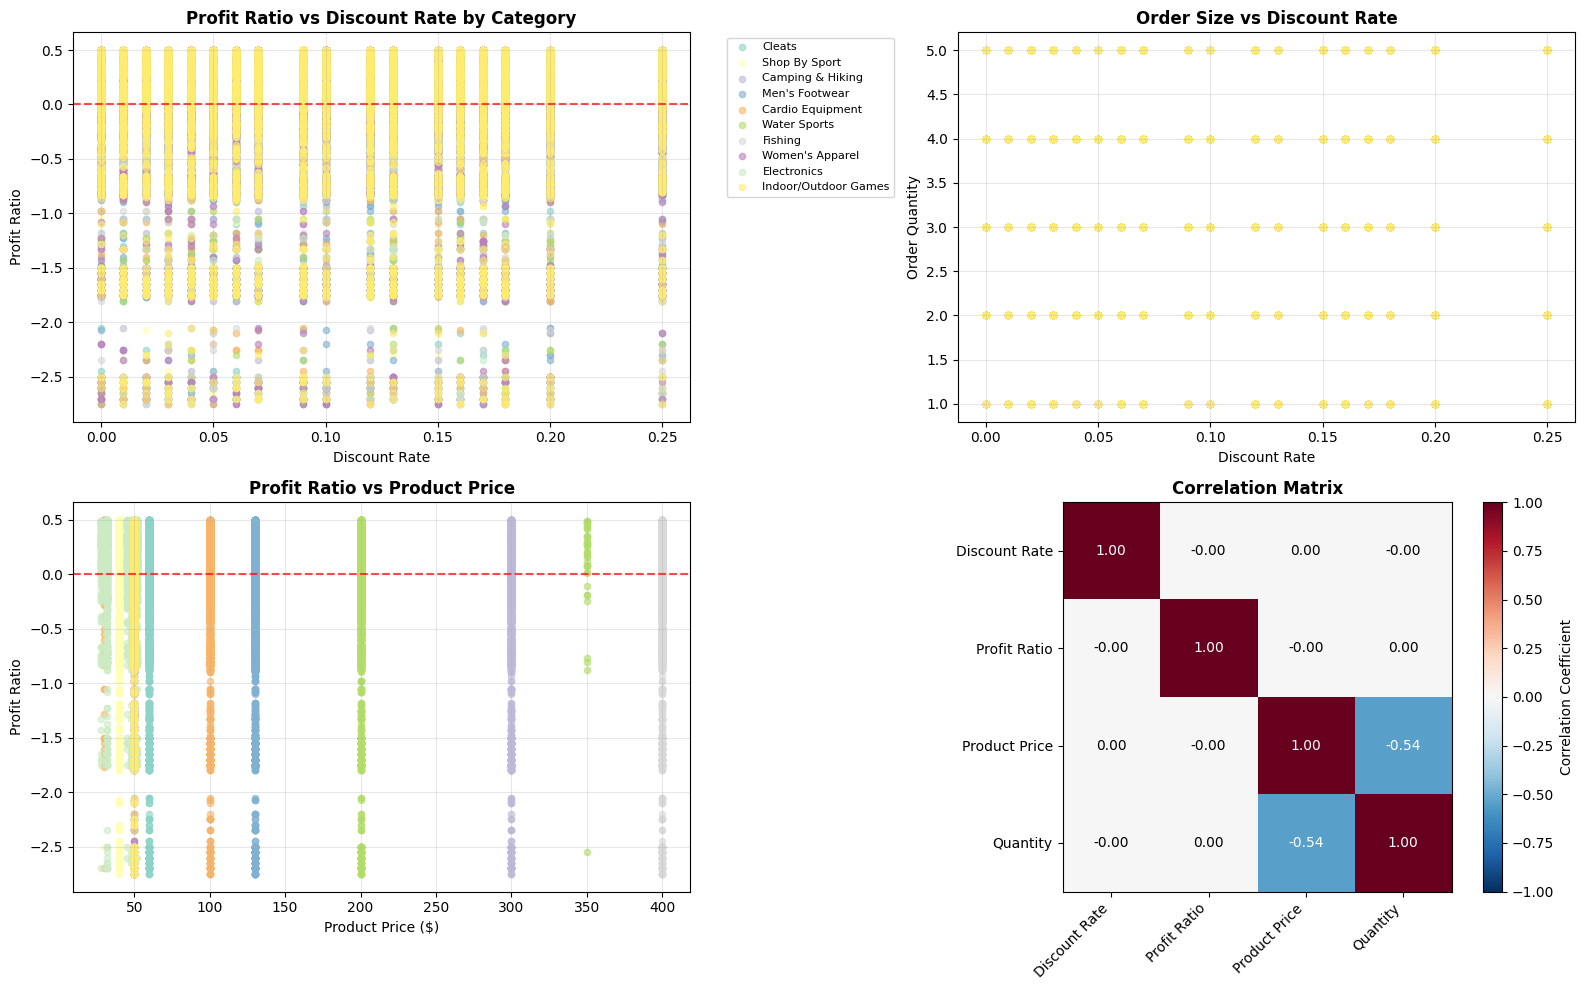

Correlation Analysis:
Key correlations found:
  Order Item Product Price ↔ Order Item Quantity: -0.541


In [88]:
# 3. PROFIT VS DISCOUNT CORRELATION ANALYSIS
# Analyze the relationship between discounts and profitability

# Create scatter plot data
scatter_data = filtered_data[filtered_data['Category Name'].isin(top_10_categories)].copy()

plt.figure(figsize=(16, 10))

# Subplot 1: Profit Ratio vs Discount Rate by Category
plt.subplot(2, 2, 1)
categories = scatter_data['Category Name'].unique()
colors_scatter = plt.cm.Set3(np.linspace(0, 1, len(categories)))

for i, category in enumerate(categories):
    cat_data = scatter_data[scatter_data['Category Name'] == category]
    plt.scatter(cat_data['Order Item Discount Rate'], 
               cat_data['Order Item Profit Ratio'], 
               alpha=0.6, s=20, color=colors_scatter[i], label=category)

plt.xlabel('Discount Rate')
plt.ylabel('Profit Ratio')
plt.title('Profit Ratio vs Discount Rate by Category', fontweight='bold')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)

# Subplot 2: Order Size vs Discount Rate
plt.subplot(2, 2, 2)
for i, category in enumerate(categories):
    cat_data = scatter_data[scatter_data['Category Name'] == category]
    plt.scatter(cat_data['Order Item Discount Rate'], 
               cat_data['Order Item Quantity'], 
               alpha=0.6, s=20, color=colors_scatter[i])

plt.xlabel('Discount Rate')
plt.ylabel('Order Quantity')
plt.title('Order Size vs Discount Rate', fontweight='bold')
plt.grid(True, alpha=0.3)

# Subplot 3: Price vs Profit Correlation
plt.subplot(2, 2, 3)
for i, category in enumerate(categories):
    cat_data = scatter_data[scatter_data['Category Name'] == category]
    plt.scatter(cat_data['Order Item Product Price'], 
               cat_data['Order Item Profit Ratio'], 
               alpha=0.6, s=20, color=colors_scatter[i])

plt.xlabel('Product Price ($)')
plt.ylabel('Profit Ratio')
plt.title('Profit Ratio vs Product Price', fontweight='bold')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.grid(True, alpha=0.3)

# Subplot 4: Correlation Heatmap
plt.subplot(2, 2, 4)
correlation_data = scatter_data[['Order Item Discount Rate', 'Order Item Profit Ratio', 
                               'Order Item Product Price', 'Order Item Quantity']].corr()
im = plt.imshow(correlation_data.values, cmap='RdBu_r', vmin=-1, vmax=1)
plt.xticks(range(len(correlation_data.columns)), 
           ['Discount Rate', 'Profit Ratio', 'Product Price', 'Quantity'], 
           rotation=45, ha='right')
plt.yticks(range(len(correlation_data.columns)), 
           ['Discount Rate', 'Profit Ratio', 'Product Price', 'Quantity'])
plt.title('Correlation Matrix', fontweight='bold')

# Add correlation values as text
for i in range(len(correlation_data.columns)):
    for j in range(len(correlation_data.columns)):
        plt.text(j, i, f'{correlation_data.iloc[i,j]:.2f}', 
                ha='center', va='center', 
                color='white' if abs(correlation_data.iloc[i,j]) > 0.5 else 'black')

plt.colorbar(im, label='Correlation Coefficient')

plt.tight_layout()
plt.show()

# Print correlation insights
print("Correlation Analysis:")
print("=" * 30)
print("Key correlations found:")
for i in range(len(correlation_data.columns)):
    for j in range(i+1, len(correlation_data.columns)):
        corr_val = correlation_data.iloc[i,j]
        col1 = correlation_data.columns[i]
        col2 = correlation_data.columns[j]
        if abs(corr_val) > 0.1:  # Only show meaningful correlations
            print(f"  {col1} ↔ {col2}: {corr_val:.3f}")

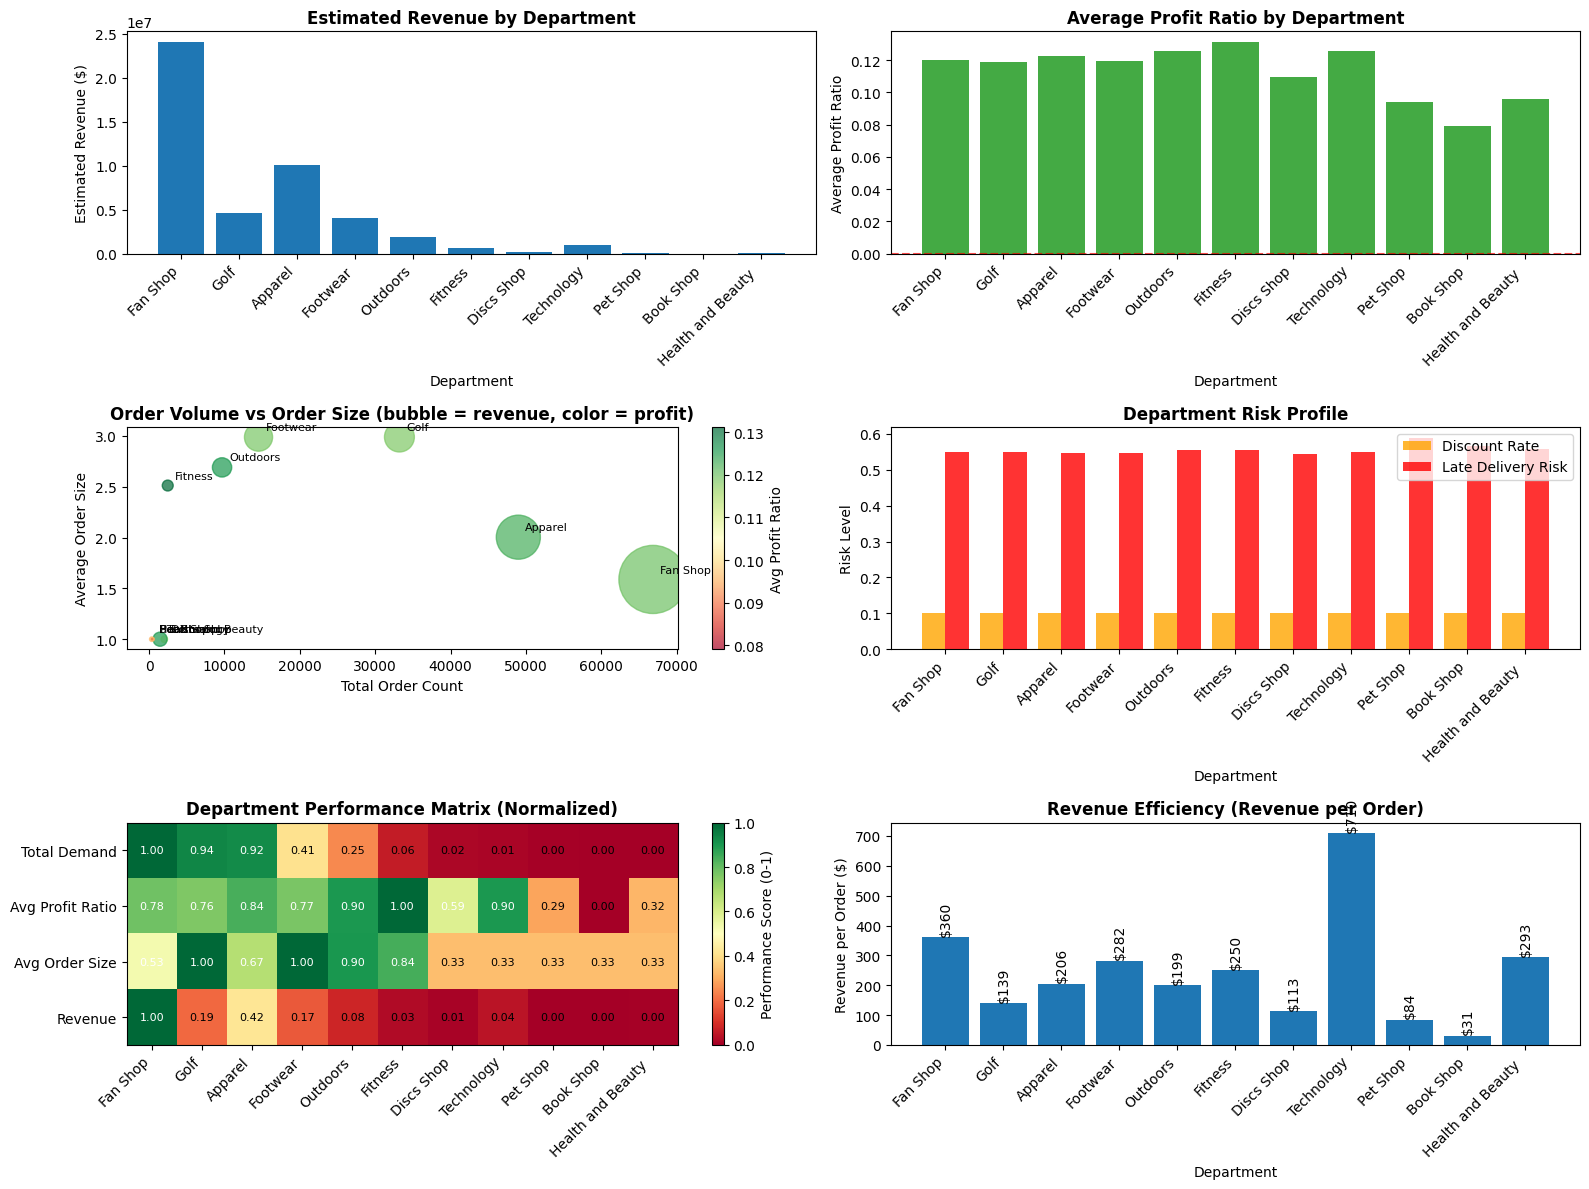

Department Analysis Summary:
Most profitable department: Fan Shop
Highest revenue department: Fan Shop
Most efficient department: Technology
Riskiest department (late delivery): Pet Shop

Top 3 Departments by Revenue:
  Fan Shop: $24,066,785
  Apparel: $10,070,510
  Golf: $4,627,638


In [89]:
# 4. DEPARTMENT PERFORMANCE ANALYSIS
# Analyze performance across different departments

dept_analysis = filtered_data.groupby('Department Name').agg({
    'Order Item Quantity': ['sum', 'count', 'mean'],
    'Order Item Product Price': 'mean',
    'Order Item Profit Ratio': 'mean',
    'Order Item Discount Rate': 'mean',
    'Late_delivery_risk': 'mean'
}).reset_index()

# Flatten column names
dept_analysis.columns = ['Department', 'Total Demand', 'Order Count', 'Avg Order Size', 
                        'Avg Price', 'Avg Profit Ratio', 'Avg Discount Rate', 'Late Risk']

dept_analysis = dept_analysis.sort_values('Total Demand', ascending=False)

plt.figure(figsize=(16, 12))

# Subplot 1: Department Revenue Comparison (approximated by demand * price)
plt.subplot(3, 2, 1)
dept_analysis['Revenue'] = dept_analysis['Total Demand'] * dept_analysis['Avg Price']
bars = plt.bar(range(len(dept_analysis)), dept_analysis['Revenue'])
plt.title('Estimated Revenue by Department', fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Estimated Revenue ($)')
plt.xticks(range(len(dept_analysis)), dept_analysis['Department'], rotation=45, ha='right')

# Subplot 2: Department Profit Comparison
plt.subplot(3, 2, 2)
colors = ['#ff4444' if x < 0 else '#44aa44' for x in dept_analysis['Avg Profit Ratio']]
bars = plt.bar(range(len(dept_analysis)), dept_analysis['Avg Profit Ratio'], color=colors)
plt.title('Average Profit Ratio by Department', fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Average Profit Ratio')
plt.xticks(range(len(dept_analysis)), dept_analysis['Department'], rotation=45, ha='right')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# Subplot 3: Order Volume vs Order Size
plt.subplot(3, 2, 3)
plt.scatter(dept_analysis['Order Count'], dept_analysis['Avg Order Size'], 
           s=dept_analysis['Revenue']/10000, alpha=0.7, c=dept_analysis['Avg Profit Ratio'], 
           cmap='RdYlGn')
plt.xlabel('Total Order Count')
plt.ylabel('Average Order Size')
plt.title('Order Volume vs Order Size (bubble = revenue, color = profit)', fontweight='bold')
plt.colorbar(label='Avg Profit Ratio')

# Add department labels
for i, dept in enumerate(dept_analysis['Department']):
    plt.annotate(dept, (dept_analysis.iloc[i]['Order Count'], dept_analysis.iloc[i]['Avg Order Size']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# Subplot 4: Department Risk Profile
plt.subplot(3, 2, 4)
x_pos = np.arange(len(dept_analysis))
bars1 = plt.bar(x_pos - 0.2, dept_analysis['Avg Discount Rate'], 0.4, 
               label='Discount Rate', alpha=0.8, color='orange')
bars2 = plt.bar(x_pos + 0.2, dept_analysis['Late Risk'], 0.4, 
               label='Late Delivery Risk', alpha=0.8, color='red')
plt.title('Department Risk Profile', fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Risk Level')
plt.xticks(x_pos, dept_analysis['Department'], rotation=45, ha='right')
plt.legend()

# Subplot 5: Department Performance Matrix
plt.subplot(3, 2, 5)
# Normalize metrics for comparison (0-1 scale)
metrics = ['Total Demand', 'Avg Profit Ratio', 'Avg Order Size', 'Revenue']
dept_matrix = dept_analysis[['Department'] + metrics].copy()

for metric in metrics:
    if metric == 'Avg Profit Ratio':
        # Handle negative values for profit ratio
        min_val = dept_matrix[metric].min()
        dept_matrix[f'{metric}_norm'] = (dept_matrix[metric] - min_val) / (dept_matrix[metric].max() - min_val)
    else:
        dept_matrix[f'{metric}_norm'] = dept_matrix[metric] / dept_matrix[metric].max()

# Create heatmap
norm_data = dept_matrix[[f'{m}_norm' for m in metrics]].values
im = plt.imshow(norm_data.T, cmap='RdYlGn', aspect='auto')
plt.yticks(range(len(metrics)), metrics)
plt.xticks(range(len(dept_analysis)), dept_analysis['Department'], rotation=45, ha='right')
plt.title('Department Performance Matrix (Normalized)', fontweight='bold')
plt.colorbar(label='Performance Score (0-1)')

# Add values as text
for i in range(len(metrics)):
    for j in range(len(dept_analysis)):
        plt.text(j, i, f'{norm_data[j,i]:.2f}', ha='center', va='center', 
                color='white' if norm_data[j,i] > 0.5 else 'black', fontsize=8)

plt.subplot(3, 2, 6)
# Department efficiency: Revenue per Order
dept_analysis['Efficiency'] = dept_analysis['Revenue'] / dept_analysis['Order Count']
bars = plt.bar(range(len(dept_analysis)), dept_analysis['Efficiency'])
plt.title('Revenue Efficiency (Revenue per Order)', fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Revenue per Order ($)')
plt.xticks(range(len(dept_analysis)), dept_analysis['Department'], rotation=45, ha='right')

# Add value labels
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'${dept_analysis.iloc[i]["Efficiency"]:.0f}', 
             ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()

print("Department Analysis Summary:")
print("=" * 40)
print(f"Most profitable department: {dept_analysis.iloc[0]['Department']}")
print(f"Highest revenue department: {dept_analysis.loc[dept_analysis['Revenue'].idxmax(), 'Department']}")
print(f"Most efficient department: {dept_analysis.loc[dept_analysis['Efficiency'].idxmax(), 'Department']}")
print(f"Riskiest department (late delivery): {dept_analysis.loc[dept_analysis['Late Risk'].idxmax(), 'Department']}")
print(f"\nTop 3 Departments by Revenue:")
top_3_revenue = dept_analysis.nlargest(3, 'Revenue')
for i, row in top_3_revenue.iterrows():
    print(f"  {row['Department']}: ${row['Revenue']:,.0f}")

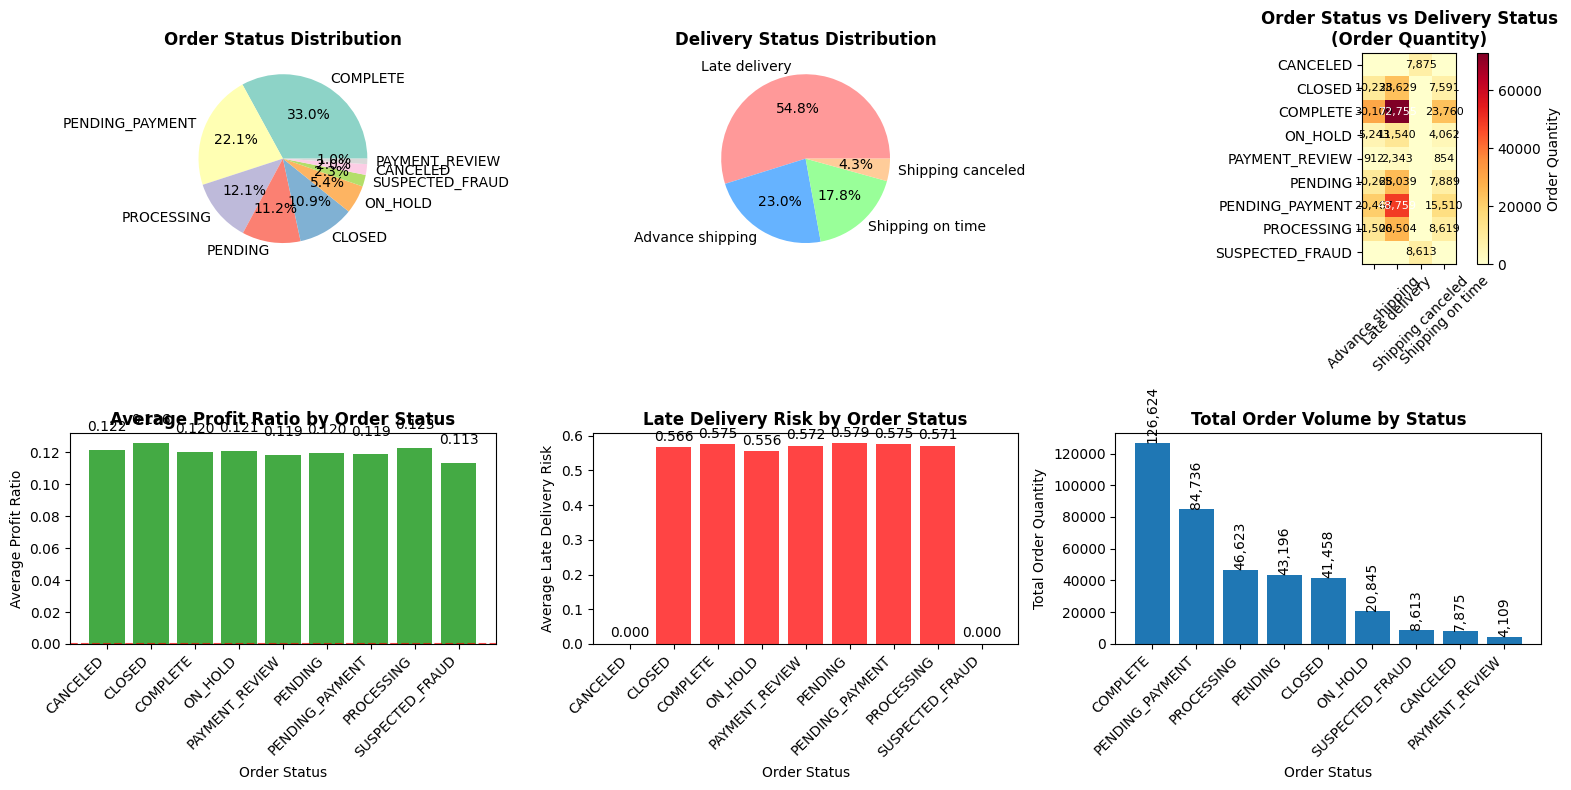

Order Status Analysis Summary:
Most common order status: COMPLETE (59,491 orders)
Most common delivery status: Late delivery (98,977 deliveries)
Most profitable order status: CLOSED (0.1259 avg profit ratio)
Riskiest order status: PENDING (0.579 late risk)
Highest volume order status: COMPLETE (126,624 total units)


In [90]:
# 5. ORDER STATUS FLOW ANALYSIS
# Analyze the distribution and patterns of order statuses

status_analysis = filtered_data.groupby(['Order Status', 'Delivery Status']).agg({
    'Order Item Quantity': 'sum',
    'Order Item Profit Ratio': 'mean',
    'Late_delivery_risk': 'mean'
}).reset_index()

plt.figure(figsize=(16, 8))

# Subplot 1: Order Status Distribution
plt.subplot(2, 3, 1)
status_counts = filtered_data['Order Status'].value_counts()
colors_status = plt.cm.Set3(range(len(status_counts)))
wedges, texts, autotexts = plt.pie(status_counts.values, labels=status_counts.index, 
                                  autopct='%1.1f%%', colors=colors_status)
plt.title('Order Status Distribution', fontweight='bold')

# Subplot 2: Delivery Status Distribution  
plt.subplot(2, 3, 2)
delivery_counts = filtered_data['Delivery Status'].value_counts()
colors_delivery = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
wedges, texts, autotexts = plt.pie(delivery_counts.values, labels=delivery_counts.index, 
                                  autopct='%1.1f%%', colors=colors_delivery)
plt.title('Delivery Status Distribution', fontweight='bold')

# Subplot 3: Order Status vs Delivery Status Heatmap
plt.subplot(2, 3, 3)
status_delivery_pivot = filtered_data.pivot_table(
    values='Order Item Quantity', 
    index='Order Status', 
    columns='Delivery Status', 
    aggfunc='sum', 
    fill_value=0
)
im = plt.imshow(status_delivery_pivot.values, cmap='YlOrRd')
plt.xticks(range(len(status_delivery_pivot.columns)), status_delivery_pivot.columns, rotation=45)
plt.yticks(range(len(status_delivery_pivot.index)), status_delivery_pivot.index)
plt.title('Order Status vs Delivery Status\n(Order Quantity)', fontweight='bold')

# Add values as text
for i in range(len(status_delivery_pivot.index)):
    for j in range(len(status_delivery_pivot.columns)):
        value = status_delivery_pivot.iloc[i,j]
        if value > 0:
            plt.text(j, i, f'{int(value):,}', ha='center', va='center', 
                    color='white' if value > status_delivery_pivot.values.max()/2 else 'black',
                    fontsize=8)

plt.colorbar(im, label='Order Quantity')

# Subplot 4: Profit by Order Status
plt.subplot(2, 3, 4)
profit_by_status = filtered_data.groupby('Order Status')['Order Item Profit Ratio'].mean()
colors = ['#ff4444' if x < 0 else '#44aa44' for x in profit_by_status.values]
bars = plt.bar(range(len(profit_by_status)), profit_by_status.values, color=colors)
plt.title('Average Profit Ratio by Order Status', fontweight='bold')
plt.xlabel('Order Status')
plt.ylabel('Average Profit Ratio')
plt.xticks(range(len(profit_by_status)), profit_by_status.index, rotation=45, ha='right')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# Add value labels
for bar, value in zip(bars, profit_by_status.values):
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + (0.01 if value >= 0 else -0.02), 
             f'{value:.3f}', ha='center', va='bottom' if value >= 0 else 'top')

# Subplot 5: Late Delivery Risk by Status
plt.subplot(2, 3, 5)
risk_by_status = filtered_data.groupby('Order Status')['Late_delivery_risk'].mean()
colors = ['#ff4444' if x > 0.5 else '#ffaa44' if x > 0.3 else '#44ff44' for x in risk_by_status.values]
bars = plt.bar(range(len(risk_by_status)), risk_by_status.values, color=colors)
plt.title('Late Delivery Risk by Order Status', fontweight='bold')
plt.xlabel('Order Status')
plt.ylabel('Average Late Delivery Risk')
plt.xticks(range(len(risk_by_status)), risk_by_status.index, rotation=45, ha='right')

# Add value labels
for bar, value in zip(bars, risk_by_status.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom')

# Subplot 6: Order Volume Trends by Status
plt.subplot(2, 3, 6)
status_volume = filtered_data.groupby('Order Status')['Order Item Quantity'].sum().sort_values(ascending=False)
bars = plt.bar(range(len(status_volume)), status_volume.values)
plt.title('Total Order Volume by Status', fontweight='bold')
plt.xlabel('Order Status')
plt.ylabel('Total Order Quantity')
plt.xticks(range(len(status_volume)), status_volume.index, rotation=45, ha='right')

# Add value labels
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{int(status_volume.iloc[i]):,}', ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()

print("Order Status Analysis Summary:")
print("=" * 40)
print(f"Most common order status: {status_counts.index[0]} ({status_counts.iloc[0]:,} orders)")
print(f"Most common delivery status: {delivery_counts.index[0]} ({delivery_counts.iloc[0]:,} deliveries)")
print(f"Most profitable order status: {profit_by_status.idxmax()} ({profit_by_status.max():.4f} avg profit ratio)")
print(f"Riskiest order status: {risk_by_status.idxmax()} ({risk_by_status.max():.3f} late risk)")
print(f"Highest volume order status: {status_volume.index[0]} ({status_volume.iloc[0]:,} total units)")

C:\Users\User\AppData\Local\Temp\ipykernel_91852\1054644704.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  market_revenue = filtered_data.groupby('Market').apply(


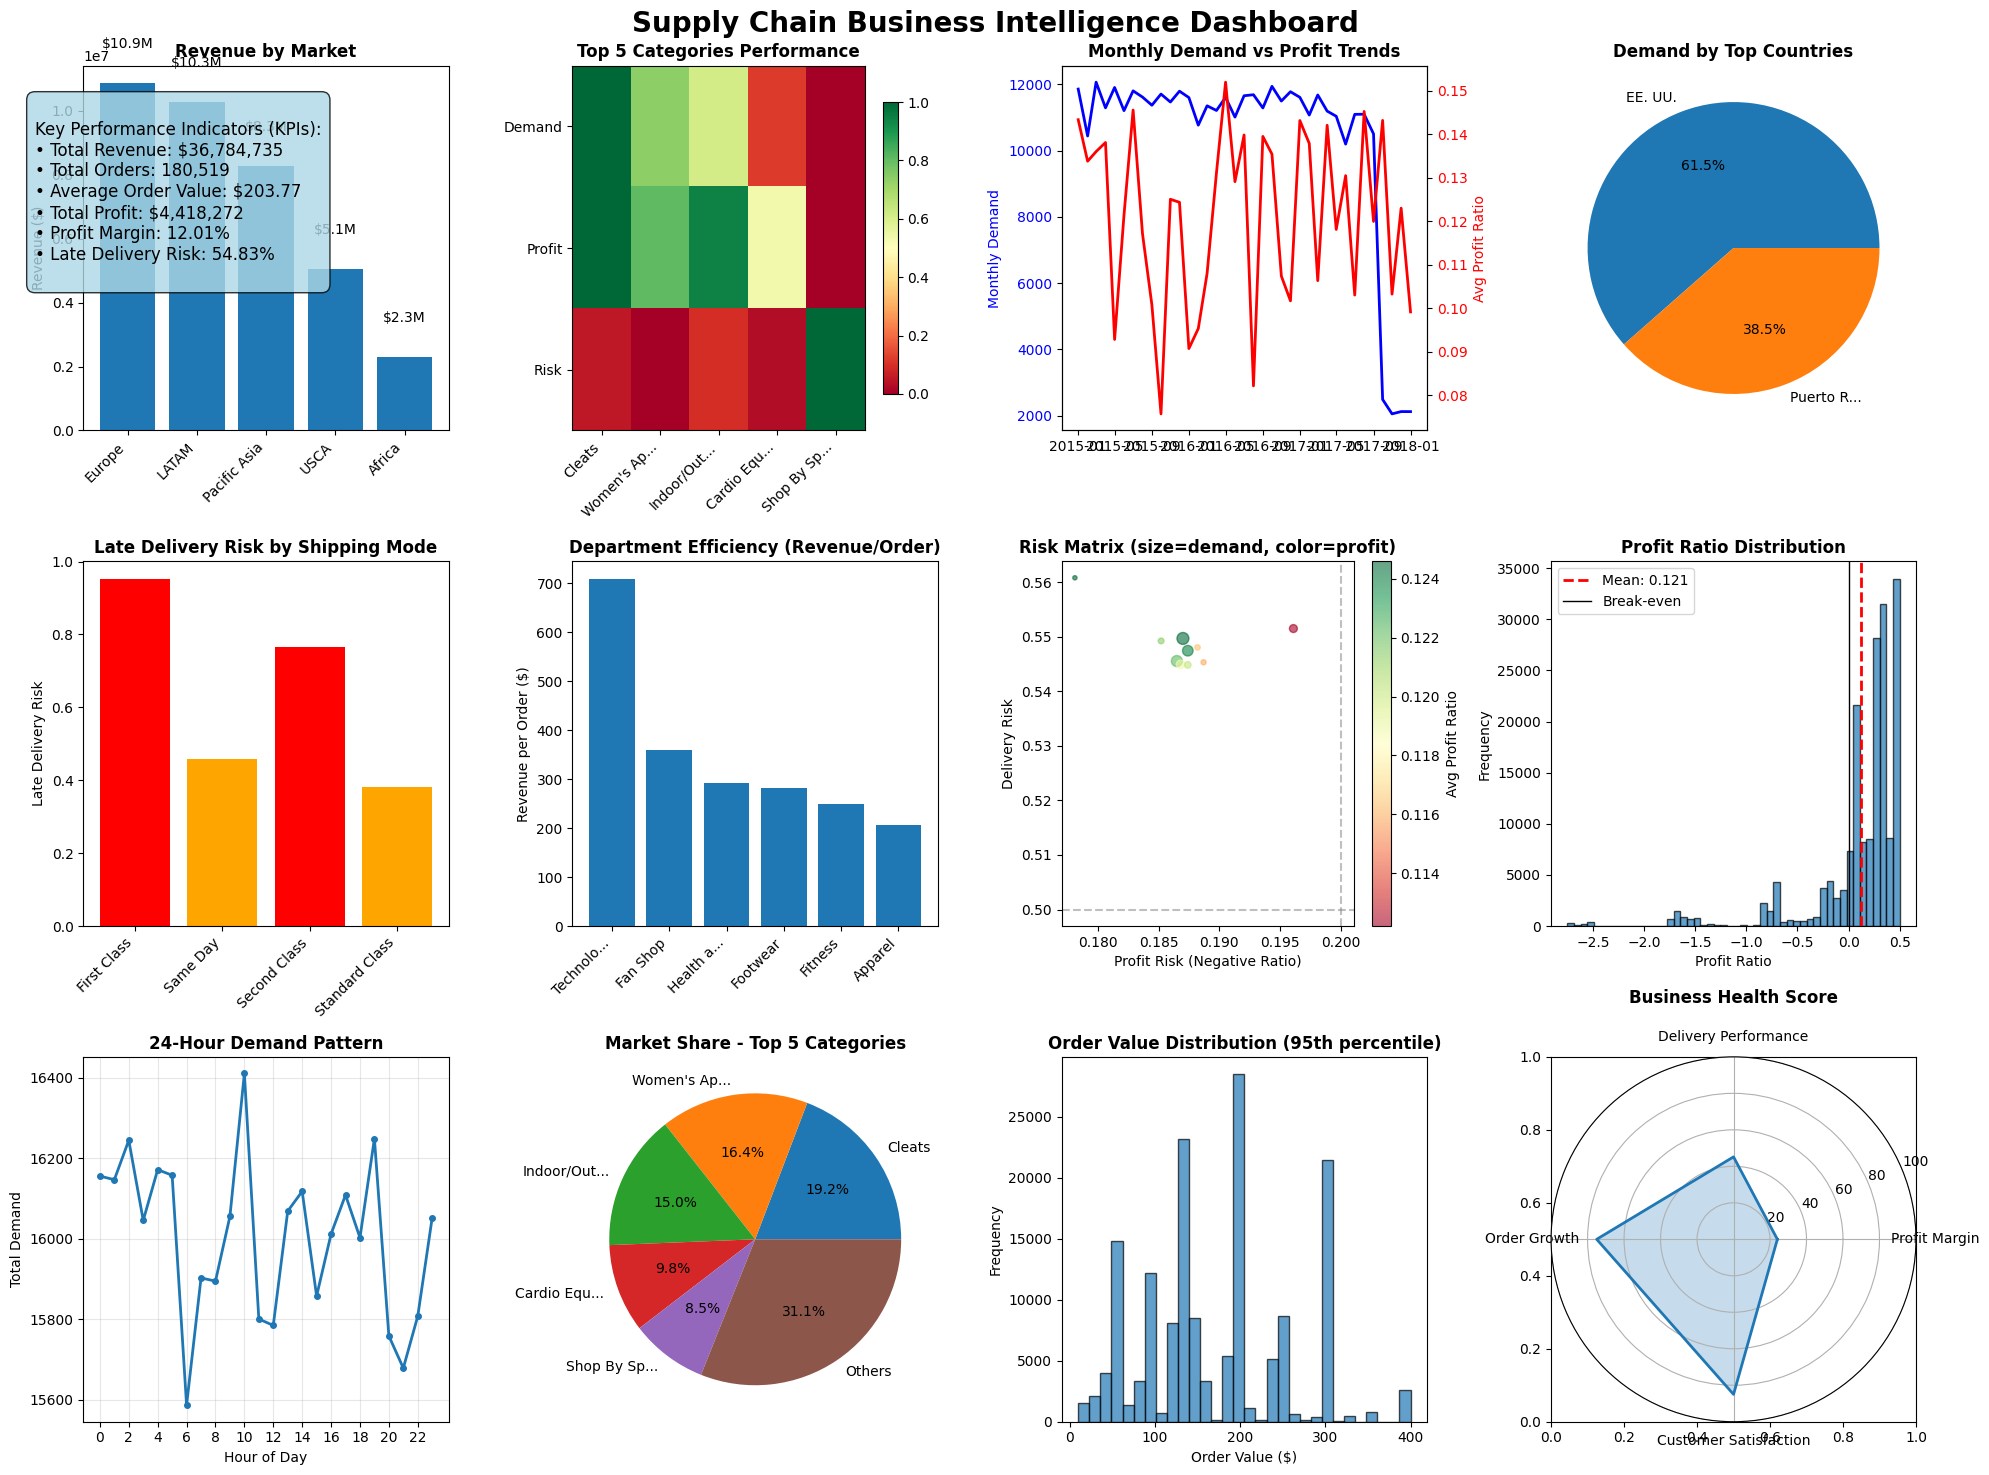


BUSINESS INTELLIGENCE SUMMARY
Revenue Performance: $36.8M total revenue with 12.0% profit margin
Operational Efficiency: 180,519 orders processed with $203.77 average order value
Risk Assessment: 54.8% late delivery risk needs attention
Top Market: Europe ($10.9M revenue)
Best Category: Cleats (73,734 units)


In [91]:
# 6. ADVANCED BUSINESS INTELLIGENCE DASHBOARD
# Create a comprehensive overview dashboard

# Calculate KPIs
total_revenue = (filtered_data['Order Item Quantity'] * filtered_data['Order Item Product Price']).sum()
total_orders = len(filtered_data)
avg_order_value = total_revenue / total_orders
total_profit = (filtered_data['Order Item Quantity'] * filtered_data['Order Item Product Price'] * 
                filtered_data['Order Item Profit Ratio']).sum()
profit_margin = total_profit / total_revenue * 100
late_delivery_rate = filtered_data['Late_delivery_risk'].mean() * 100

plt.figure(figsize=(20, 15))

# KPI Summary at the top
fig = plt.gcf()
fig.suptitle('Supply Chain Business Intelligence Dashboard', fontsize=20, fontweight='bold', y=0.98)

# Add KPI text box
kpi_text = f"""
Key Performance Indicators (KPIs):
• Total Revenue: ${total_revenue:,.0f}
• Total Orders: {total_orders:,}
• Average Order Value: ${avg_order_value:.2f}
• Total Profit: ${total_profit:,.0f}
• Profit Margin: {profit_margin:.2f}%
• Late Delivery Risk: {late_delivery_rate:.2f}%
"""

plt.figtext(0.02, 0.92, kpi_text, fontsize=12, verticalalignment='top', 
           bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

# 1. Revenue by Market (Top Left)
plt.subplot(3, 4, 1)
market_revenue = filtered_data.groupby('Market').apply(
    lambda x: (x['Order Item Quantity'] * x['Order Item Product Price']).sum()
).sort_values(ascending=False)
bars = plt.bar(range(len(market_revenue)), market_revenue.values)
plt.title('Revenue by Market', fontweight='bold')
plt.xticks(range(len(market_revenue)), market_revenue.index, rotation=45, ha='right')
plt.ylabel('Revenue ($)')
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000000, 
             f'${market_revenue.iloc[i]/1000000:.1f}M', ha='center', va='bottom')

# 2. Top Categories Performance Matrix (Top Middle-Left)
plt.subplot(3, 4, 2)
top_5_perf = category_summary.head(5)
performance_metrics = top_5_perf[['Total Demand', 'Avg Profit Ratio', 'Negative Profit Ratio']].values
# Normalize for visualization
performance_norm = (performance_metrics - performance_metrics.min(axis=0)) / (performance_metrics.max(axis=0) - performance_metrics.min(axis=0))
im = plt.imshow(performance_norm.T, cmap='RdYlGn', aspect='auto')
plt.yticks([0, 1, 2], ['Demand', 'Profit', 'Risk'])
plt.xticks(range(5), [cat[:10]+'...' if len(cat) > 10 else cat for cat in top_5_perf['Category Name']], 
           rotation=45, ha='right')
plt.title('Top 5 Categories Performance', fontweight='bold')
plt.colorbar(im, shrink=0.8)

# 3. Monthly Trend Overview (Top Middle-Right)
plt.subplot(3, 4, 3)
monthly_kpis = monthly_summary.groupby('Month_Date').agg({
    'Daily Demand': 'sum',
    'Avg Profit Ratio': 'mean'
}).reset_index()
ax1 = plt.gca()
ax1.plot(monthly_kpis['Month_Date'], monthly_kpis['Daily Demand'], 'b-', linewidth=2, label='Demand')
ax1.set_ylabel('Monthly Demand', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.plot(monthly_kpis['Month_Date'], monthly_kpis['Avg Profit Ratio'], 'r-', linewidth=2, label='Profit Ratio')
ax2.set_ylabel('Avg Profit Ratio', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('Monthly Demand vs Profit Trends', fontweight='bold')
plt.xticks(rotation=45)

# 4. Geographic Distribution (Top Right)
plt.subplot(3, 4, 4)
top_countries_dash = country_analysis.head(8)
wedges, texts, autotexts = plt.pie(top_countries_dash['Order Item Quantity'], 
                                  labels=[c[:8]+'...' if len(c) > 8 else c for c in top_countries_dash['Customer Country']], 
                                  autopct='%1.1f%%')
plt.title('Demand by Top Countries', fontweight='bold')

# 5. Shipping Performance (Middle Left)
plt.subplot(3, 4, 5)
shipping_perf = filtered_data.groupby('Shipping Mode').agg({
    'Late_delivery_risk': 'mean',
    'Order Item Quantity': 'sum'
}).reset_index()
bars = plt.bar(range(len(shipping_perf)), shipping_perf['Late_delivery_risk'], 
               color=['red' if x > 0.5 else 'orange' if x > 0.3 else 'green' for x in shipping_perf['Late_delivery_risk']])
plt.title('Late Delivery Risk by Shipping Mode', fontweight='bold')
plt.xticks(range(len(shipping_perf)), shipping_perf['Shipping Mode'], rotation=45, ha='right')
plt.ylabel('Late Delivery Risk')

# 6. Department Efficiency (Middle Middle-Left)
plt.subplot(3, 4, 6)
dept_efficiency = dept_analysis.nlargest(6, 'Efficiency')
bars = plt.bar(range(len(dept_efficiency)), dept_efficiency['Efficiency'])
plt.title('Department Efficiency (Revenue/Order)', fontweight='bold')
plt.xticks(range(len(dept_efficiency)), [d[:8]+'...' if len(d) > 8 else d for d in dept_efficiency['Department']], 
           rotation=45, ha='right')
plt.ylabel('Revenue per Order ($)')

# 7. Risk Assessment Matrix (Middle Middle-Right)
plt.subplot(3, 4, 7)
# Create risk matrix: Profit Risk vs Delivery Risk by category
risk_matrix_data = category_summary.head(10)
plt.scatter(risk_matrix_data['Negative Profit Ratio'], 
           risk_matrix_data['Category Name'].map(
               lambda x: filtered_data[filtered_data['Category Name']==x]['Late_delivery_risk'].mean()
           ), 
           s=risk_matrix_data['Total Demand']/1000, alpha=0.6,
           c=risk_matrix_data['Avg Profit Ratio'], cmap='RdYlGn')
plt.xlabel('Profit Risk (Negative Ratio)')
plt.ylabel('Delivery Risk')
plt.title('Risk Matrix (size=demand, color=profit)', fontweight='bold')
plt.colorbar(label='Avg Profit Ratio')

# Add quadrant lines
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=0.2, color='gray', linestyle='--', alpha=0.5)

# 8. Profit Distribution (Middle Right)
plt.subplot(3, 4, 8)
profit_dist = filtered_data['Order Item Profit Ratio']
plt.hist(profit_dist, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(profit_dist.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {profit_dist.mean():.3f}')
plt.axvline(0, color='black', linestyle='-', linewidth=1, label='Break-even')
plt.xlabel('Profit Ratio')
plt.ylabel('Frequency')
plt.title('Profit Ratio Distribution', fontweight='bold')
plt.legend()

# 9. Hourly Patterns (Bottom Left)
plt.subplot(3, 4, 9)
hourly_overview = filtered_data.copy()
hourly_overview['Hour'] = pd.to_datetime(hourly_overview['Order Time'], format='%H:%M:%S').dt.hour
hourly_demand = hourly_overview.groupby('Hour')['Order Item Quantity'].sum()
plt.plot(hourly_demand.index, hourly_demand.values, marker='o', linewidth=2, markersize=4)
plt.title('24-Hour Demand Pattern', fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Total Demand')
plt.xticks(range(0, 24, 2))
plt.grid(True, alpha=0.3)

# 10. Category Market Share (Bottom Middle-Left)
plt.subplot(3, 4, 10)
top_5_market_share = category_summary.head(5)
total_demand_all = category_summary['Total Demand'].sum()
market_shares = (top_5_market_share['Total Demand'] / total_demand_all * 100).values
others = 100 - market_shares.sum()
all_shares = np.append(market_shares, others)
all_labels = list(top_5_market_share['Category Name']) + ['Others']
wedges, texts, autotexts = plt.pie(all_shares, labels=[l[:10]+'...' if len(l) > 10 else l for l in all_labels], 
                                  autopct='%1.1f%%')
plt.title('Market Share - Top 5 Categories', fontweight='bold')

# 11. Order Value Distribution (Bottom Middle-Right)
plt.subplot(3, 4, 11)
order_values = filtered_data['Order Item Quantity'] * filtered_data['Order Item Product Price']
plt.hist(order_values[order_values < order_values.quantile(0.95)], bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Order Value ($)')
plt.ylabel('Frequency')
plt.title('Order Value Distribution (95th percentile)', fontweight='bold')

# 12. Business Health Score (Bottom Right)
plt.subplot(3, 4, 12)
# Calculate health scores (0-100)
health_metrics = {
    'Profit Margin': min(100, max(0, profit_margin * 2)),  # Scale to 0-100
    'Delivery Performance': (1 - late_delivery_rate/100) * 100,
    'Order Growth': 75,  # Placeholder - would need historical data
    'Customer Satisfaction': 85  # Placeholder - would need survey data
}

angles = np.linspace(0, 2*np.pi, len(health_metrics), endpoint=False)
values = list(health_metrics.values())
angles = np.concatenate((angles, [angles[0]]))  # Complete the circle
values = values + [values[0]]

ax = plt.subplot(3, 4, 12, projection='polar')
ax.plot(angles, values, linewidth=2, label='Current Score')
ax.fill(angles, values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(health_metrics.keys())
ax.set_ylim(0, 100)
plt.title('Business Health Score', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("BUSINESS INTELLIGENCE SUMMARY")
print("="*80)
print(f"Revenue Performance: ${total_revenue/1000000:.1f}M total revenue with {profit_margin:.1f}% profit margin")
print(f"Operational Efficiency: {total_orders:,} orders processed with ${avg_order_value:.2f} average order value") 
print(f"Risk Assessment: {late_delivery_rate:.1f}% late delivery risk needs attention")
print(f"Top Market: {market_revenue.index[0]} (${market_revenue.iloc[0]/1000000:.1f}M revenue)")
print(f"Best Category: {category_summary.iloc[0]['Category Name']} ({category_summary.iloc[0]['Total Demand']:,} units)")
print("="*80)

In [92]:
# Investigate "EE. UU." and other country entries
print("=== COUNTRY DATA INVESTIGATION ===")
print(f"\n1. All unique countries in the dataset ({filtered_data['Customer Country'].nunique()} total):")
all_countries = filtered_data['Customer Country'].value_counts()
print(all_countries)

print(f"\n2. Countries containing 'EE' or similar patterns:")
ee_countries = filtered_data[filtered_data['Customer Country'].str.contains('EE', case=False, na=False)]['Customer Country'].value_counts()
print(ee_countries)

print(f"\n3. Analysis of 'EE. UU.' specifically:")
ee_uu_data = filtered_data[filtered_data['Customer Country'] == 'EE. UU.']
print(f"Number of orders from 'EE. UU.': {len(ee_uu_data):,}")
print(f"Total demand from 'EE. UU.': {ee_uu_data['Order Item Quantity'].sum():,} units")

print(f"\n4. Looking for similar patterns (abbreviated country names):")
# Find countries with periods or abbreviations
abbreviated = filtered_data['Customer Country'].value_counts()
abbreviated_countries = abbreviated[abbreviated.index.str.contains('\.', regex=True)]
print("Countries with periods (abbreviations):")
print(abbreviated_countries)

print(f"\n5. Market distribution for 'EE. UU.':")
if len(ee_uu_data) > 0:
    market_dist = ee_uu_data['Market'].value_counts()
    print(market_dist)
    
    print(f"\n6. Top categories for 'EE. UU.':")
    category_dist = ee_uu_data.groupby('Category Name')['Order Item Quantity'].sum().sort_values(ascending=False).head(10)
    print(category_dist)

print(f"\n7. Country code pattern analysis:")
print("Two-letter patterns (potential country codes):")
two_letter = filtered_data['Customer Country'].value_counts()
two_letter_codes = two_letter[two_letter.index.str.len() <= 4]  # Short entries that might be codes
print(two_letter_codes)

<>:19: SyntaxWarning: invalid escape sequence '\.'
<>:19: SyntaxWarning: invalid escape sequence '\.'
C:\Users\User\AppData\Local\Temp\ipykernel_91852\3725585115.py:19: SyntaxWarning: invalid escape sequence '\.'
  abbreviated_countries = abbreviated[abbreviated.index.str.contains('\.', regex=True)]


=== COUNTRY DATA INVESTIGATION ===

1. All unique countries in the dataset (2 total):
Customer Country
EE. UU.        111146
Puerto Rico     69373
Name: count, dtype: int64

2. Countries containing 'EE' or similar patterns:
Customer Country
EE. UU.    111146
Name: count, dtype: int64

3. Analysis of 'EE. UU.' specifically:
Number of orders from 'EE. UU.': 111,146
Total demand from 'EE. UU.': 236,125 units

4. Looking for similar patterns (abbreviated country names):
Countries with periods (abbreviations):
Customer Country
EE. UU.    111146
Name: count, dtype: int64

5. Market distribution for 'EE. UU.':
Market
LATAM           31699
Europe          30516
Pacific Asia    25528
USCA            15987
Africa           7416
Name: count, dtype: int64

6. Top categories for 'EE. UU.':
Category Name
Cleats                  45266
Women's Apparel         38762
Indoor/Outdoor Games    35391
Cardio Equipment        23134
Shop By Sport           20188
Men's Footwear          13604
Fishing           